# ☔ Indian Rainfall Data Analysis: Exploratory Data Analysis (EDA)

#### Submitted By:
**Name:** Aryan Paratakke

**PRN:** 22070521070

**Section:** C

**Semester:** 7

**Batch:** 2022-2026

**Under the Guidance of:** Dr. Bhupesh Kumar Dewangan

**Course:** Data Science (CA1 Submission)

**Institute:** Symbiosis Institute of Technology (SIT), Nagpur


## 1. Introduction to the Rainfall Data Analysis Notebook

This Jupyter Notebook is where I'm doing an Exploratory Data Analysis (EDA) for a dataset about Indian climate and rainfall. My main goal with this EDA is to find interesting patterns, trends, and anything unusual in how rainfall happens across different districts and states in India. The data covers daily, weekly, cumulative (total over a period), and monthly rainfall readings.

Through this project, I want to:
* Understand deeply how rainfall is distributed and behaves in different parts of the country.
* Spot any strange data points or outliers that might point to unusual weather events or even mistakes in the data.
* Figure out what factors might be affecting rainfall patterns, with a special focus on my home state, Maharashtra, and its neighboring states.

I've organized this notebook into a few clear sections to make sure I cover everything systematically:

* **Dataset Setup:** This is where I load the data, take a first look at what it contains, and fix any basic issues with the data types.
* **Data Cleaning:** Here, I'll deal with any missing information, correct data types more thoroughly, make column names consistent, and maybe even create some new useful columns from the existing ones.
* **Statistical Profiling:** I'll calculate basic statistics (like averages, ranges) for the numbers and categories in my data to get a quick summary.
* **Univariate Analysis:** This section is about looking at each variable by itself, often using graphs, to understand its own story.
* **Bivariate Analysis:** Here, I'll explore how two different variables relate to each other to see if there are any connections.
* **Time-Series Analysis:** I'll look at how rainfall changes over time – daily, weekly, and monthly – to see any seasonal patterns or long-term trends.
* **Geospatial Analysis:** I'll use maps to visualize rainfall data across different parts of India, which should be pretty cool for seeing regional differences.
* **Comparative Analysis:** I'll specifically compare Maharashtra's rainfall with that of its border-sharing states (Gujarat, Madhya Pradesh, Chhattisgarh, Telangana, Karnataka, Goa) to see how they differ.

My aim with this detailed and organized approach is to truly understand this rainfall dataset. This will then provide a good base for any future advanced studies on climate or for making better decisions about water resources.

In [2]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

# Configuration for display and warnings
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set display width for better table formatting

print("Libraries imported and display options set.")

Libraries imported and display options set.


In [3]:
# Define the file path
file_path = 'original_rainfall_data.csv'

# Load the dataset using low_memory=False
try:
    df = pd.read_csv(file_path, low_memory=False)
    print(f"Dataset '{file_path}' loaded successfully.")
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure it's in the correct directory.")
    # Exit or handle the error appropriately
    exit() # Or raise an exception, or set df to None

print("\n### First 5 Rows of the Dataset:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

Dataset 'original_rainfall_data.csv' loaded successfully.

### First 5 Rows of the Dataset:
| OBJ_ID   | srcDistrictName        | srcStateName      | srcYear   | srcCalendarDay   | Daily Actual   | Daily Normal   | Percentage of Daily Departure   | Daily Category   | Weekly Date              | Weekly Actual   | Weekly Normal   | Percentage of Weekly Departure   | Weekly Category   | Cumulative Date   | Cumulative Actual   | Cumulative Normal   | Percentage of Cumulative Departure   | Cumulative Category   | Monthly Date                 | Monthly Acutual   | Monthly Normal   | Percentage of Monthly Departure   | Monthly Category   |
|:---------|:-----------------------|:------------------|:----------|:-----------------|:---------------|:---------------|:--------------------------------|:-----------------|:-------------------------|:----------------|:----------------|:---------------------------------|:------------------|:------------------|:--------------------|:--------------------|:--

In [4]:
print("\n### DataFrame Information (df.info()):")
df.info()

print("\n### Column Names (df.columns):")
print(df.columns.tolist())


### DataFrame Information (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229401 entries, 0 to 1229400
Data columns (total 24 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   OBJ_ID                              416226 non-null   float64
 1   srcDistrictName                     1229401 non-null  object 
 2   srcStateName                        1229401 non-null  object 
 3   srcYear                             1229401 non-null  int64  
 4   srcCalendarDay                      1229401 non-null  object 
 5   Daily Actual                        1213795 non-null  float64
 6   Daily Normal                        1229399 non-null  float64
 7   Percentage of Daily Departure       1211552 non-null  float64
 8   Daily Category                      1229401 non-null  object 
 9   Weekly Date                         412501 non-null   object 
 10  Weekly Actual                       41

## **Step 2: Data Cleaning**

This crucial step focuses on preparing the raw dataset for effective analysis. It involves standardizing column names, addressing missing values, and ensuring all data types are appropriate for subsequent operations.

**2.1 Standardizing Column Names**

Column names often contain inconsistencies like leading/trailing spaces or typos, which can hinder data manipulation. This section aims to standardize column names for improved readability and accessibility.

In [5]:
import pandas as pd
import numpy as np



print("### 2.1 Standardizing Column Names\n")

# Display original column names for reference
print("Original Columns:")
print(df.columns.tolist())


cleaned_columns = []
for col in df.columns:
    processed_col = col.strip() # Remove leading/trailing whitespace
    if processed_col == 'Percentage of Cumulati ve Departure':
        processed_col = 'Percentage of Cumulative Departure' # Correcting observed typo
    elif processed_col == 'Monthly Acutual':
        processed_col = 'Monthly Actual' # Correcting observed typo
    cleaned_columns.append(processed_col)

# The DataFrame's columns are updated with the standardized names.
df.columns = cleaned_columns

# Display the new, clean column names
print("\nCleaned Columns:")
print(df.columns.tolist())

# A preview of the DataFrame with the updated column names is shown.
print("\nFirst 2 rows with new, clean column names:")
print(df.head(2).to_markdown(index=False, numalign="left", stralign="left"))

### 2.1 Standardizing Column Names

Original Columns:
['OBJ_ID', 'srcDistrictName', 'srcStateName', 'srcYear', 'srcCalendarDay', 'Daily Actual', 'Daily Normal', 'Percentage of Daily Departure', 'Daily Category', 'Weekly Date', 'Weekly Actual', 'Weekly Normal', 'Percentage of Weekly Departure', 'Weekly Category', 'Cumulative Date', 'Cumulative Actual', 'Cumulative Normal', 'Percentage of Cumulative Departure', 'Cumulative Category', 'Monthly Date', 'Monthly Acutual', 'Monthly Normal', 'Percentage of Monthly Departure', 'Monthly Category']

Cleaned Columns:
['OBJ_ID', 'srcDistrictName', 'srcStateName', 'srcYear', 'srcCalendarDay', 'Daily Actual', 'Daily Normal', 'Percentage of Daily Departure', 'Daily Category', 'Weekly Date', 'Weekly Actual', 'Weekly Normal', 'Percentage of Weekly Departure', 'Weekly Category', 'Cumulative Date', 'Cumulative Actual', 'Cumulative Normal', 'Percentage of Cumulative Departure', 'Cumulative Category', 'Monthly Date', 'Monthly Actual', 'Monthly Normal', 'Per

**2.2 Handling Missing Values**

Missing data can significantly impact the reliability of an analysis. This section quantifies missing values and outlines the strategy for their treatment to ensure data completeness and integrity.

In [6]:
print("\n### 2.2 Handling Missing Values\n")

# Calculation of missing values (count and percentage) for each column.
missing_values_count = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Creation of a DataFrame to summarize missing value information.
missing_info_df = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage (%)': missing_percentage
})

# Display of columns with missing values, sorted by percentage in descending order.
missing_info_df_filtered = missing_info_df[missing_info_df['Missing Count'] > 0].sort_values(by='Missing Percentage (%)', ascending=False)

print("Missing Values Information (before imputation):")
print(missing_info_df_filtered.to_markdown(numalign="left", stralign="left"))

print("\n#### Strategy for Missing Value Imputation:")
print("- **OBJ_ID:** This column serves as a unique identifier. Given its high percentage of missing values (approximately 66%) and its non-metric nature for rainfall calculations, it will be converted to a nullable integer type (`Int64`). Missing `OBJ_ID` values, if any remain after initial load, will be represented as `NaN` within this type, preserving the integrity of the identifier without introducing artificial values.")
print("- **Weekly and Cumulative Rainfall Data:** A significant proportion (around 66%) of data points in columns related to weekly and cumulative rainfall (e.g., 'Weekly Actual', 'Cumulative Actual', and their 'Normal'/'Departure' counterparts) are missing. This suggests that these records are likely not applicable or not captured at the daily granularity for all entries, rather than being truly erroneous or lost data.")
print("  - For numerical rainfall-related columns (e.g., 'Daily Actual', 'Weekly Normal', 'Percentage of Cumulative Departure'), missing values will be imputed with `0.0`. This approach is adopted under the assumption that a missing rainfall record often implies zero rainfall for that period, which is a valid data point in meteorological contexts.")
print("  - For categorical columns (e.g., 'Daily Category', 'Weekly Category'), missing values will be filled with the string 'Unknown'. This clearly indicates the absence of a recorded category.")
print("  - Date columns, when missing, are inherently difficult to impute accurately. The approach for date ranges is to parse them into 'Start Date' and 'End Date' columns, where unparseable or missing entries will result in `NaT` (Not a Time) values, which is the standard Pandas representation for missing datetime objects.")

# Application of the imputation strategy.
# Numerical columns targeted for filling with 0.0.
numeric_columns_to_impute_zero = [
    'Daily Actual', 'Daily Normal', 'Percentage of Daily Departure',
    'Weekly Actual', 'Weekly Normal', 'Percentage of Weekly Departure',
    'Cumulative Actual', 'Cumulative Normal', 'Percentage of Cumulative Departure',
    'Monthly Actual', 'Monthly Normal', 'Percentage of Monthly Departure'
]

for col in numeric_columns_to_impute_zero:
    if col in df.columns: # Verify column existence
        df[col] = df[col].fillna(0.0)

# Categorical columns targeted for filling with 'Unknown'.
categorical_columns_to_impute_unknown = [
    'Daily Category', 'Weekly Category', 'Cumulative Category', 'Monthly Category'
]
for col in categorical_columns_to_impute_unknown:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

# Re-evaluation of missing values after imputation to confirm effectiveness.
print("\nMissing Values Information (after imputation):")
missing_values_after_imputation_count = df.isnull().sum()
missing_info_after_imputation_df = pd.DataFrame({
    'Missing Count': missing_values_after_imputation_count,
    'Missing Percentage (%)': (missing_values_after_imputation_count / len(df)) * 100
})
missing_info_after_imputation_df_filtered = missing_info_after_imputation_df[missing_info_after_imputation_df['Missing Count'] > 0]

if missing_info_after_imputation_df_filtered.empty:
    print("All targeted numerical and categorical missing values have been successfully imputed.")
else:
    print("Remaining missing values (primarily in parsed date columns as NaT):")
    print(missing_info_after_imputation_df_filtered.to_markdown(numalign="left", stralign="left"))


### 2.2 Handling Missing Values

Missing Values Information (before imputation):
|                                    | Missing Count   | Missing Percentage (%)   |
|:-----------------------------------|:----------------|:-------------------------|
| Percentage of Weekly Departure     | 819493          | 66.6579                  |
| Percentage of Cumulative Departure | 817724          | 66.514                   |
| Weekly Actual                      | 817644          | 66.5075                  |
| Weekly Date                        | 816900          | 66.447                   |
| Cumulative Actual                  | 816213          | 66.3911                  |
| Cumulative Date                    | 814461          | 66.2486                  |
| Weekly Normal                      | 813177          | 66.1442                  |
| Cumulative Normal                  | 813176          | 66.1441                  |
| OBJ_ID                             | 813175          | 66.144               

**2.3 Correcting Data Types and Parsing Dates**

Accurate data types are fundamental for correct computations and analyses. This section focuses on converting columns to their appropriate types, with particular attention to parsing date strings into usable datetime objects.

In [7]:
print("\n### 2.3 Correcting Data Types and Parsing Dates\n")


try:
    df['srcCalendarDay'] = pd.to_datetime(df['srcCalendarDay'], errors='coerce', dayfirst=True)
    print(f"Column '{'srcCalendarDay'}' successfully converted to datetime.")
except Exception as e:
    print(f"Error encountered during conversion of '{'srcCalendarDay'}': {e}")


# Conversion of 'Cumulative Date' to datetime objects.
try:
    df['Cumulative Date'] = pd.to_datetime(df['Cumulative Date'], errors='coerce', dayfirst=True)
    print(f"Column '{'Cumulative Date'}' successfully converted to datetime.")
except Exception as e:
    print(f"Error encountered during conversion of '{'Cumulative Date'}': {e}")


# Parsing of date range columns: 'Weekly Date' and 'Monthly Date'.
# These columns contain strings in the format 'DD-MM-YYYY To DD-MM-YYYY'.
date_range_columns_to_parse = ['Weekly Date', 'Monthly Date']

for col in date_range_columns_to_parse:
    if col in df.columns:
        # The original string is cleaned (removing commas) and split into two parts.
        df[f'{col} Start Date'] = df[col].astype(str).str.split(' To ').str[0].str.replace(',','').str.strip()
        df[f'{col} End Date'] = df[col].astype(str).str.split(' To ').str[1].str.replace(',','').str.strip()

        # These new string columns are then converted to datetime objects.
        df[f'{col} Start Date'] = pd.to_datetime(df[f'{col} Start Date'], errors='coerce', dayfirst=True)
        df[f'{col} End Date'] = pd.to_datetime(df[f'{col} End Date'], errors='coerce', dayfirst=True)

        print(f"Column '{col}' successfully parsed into '{col} Start Date' and '{col} End Date', now datetime objects.")
    else:
        print(f"Column '{col}' not found. Skipping date range parsing for this column.")

# Verification of numerical columns ('Normal' and 'Departure' values).
# This check ensures that no non-numeric characters remain in these columns, which are critical for calculations.
numeric_columns_to_verify = [
    'Daily Normal', 'Percentage of Daily Departure',
    'Weekly Normal', 'Percentage of Weekly Departure',
    'Cumulative Normal', 'Percentage of Cumulative Departure',
    'Monthly Normal', 'Percentage of Monthly Departure'
]

print("\nVerification of numerical columns for non-numeric entries (excluding NaNs):")
for col in numeric_columns_to_verify:
    if col in df.columns:
        # Identifies any values that are not numbers after conversion attempt (but were not NaN before).
        non_numeric_entries = df[col][pd.to_numeric(df[col], errors='coerce').isna() & df[col].notna()]
        if not non_numeric_entries.empty:
            print(f"- Column '{col}' was found to contain non-numeric values. Examples: {non_numeric_entries.unique()[:5]}")
            # Converts these columns to numeric, turning problematic entries into NaN.
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"  Column '{col}' converted to numeric, with non-numeric entries coerced to NaN.")
        else:
            print(f"- Column '{col}' is confirmed to be purely numeric (or contains only NaNs, which have been handled).")
    else:
        print(f"- Column '{col}' not found for verification.")

# Conversion of 'OBJ_ID' to a nullable integer type.
# The `Int64` Dtype allows for integer values while also accommodating missing data (NaN).
df['OBJ_ID'] = df['OBJ_ID'].astype('Int64')

print("\nFinal data types after all cleaning operations:")
df.info()

print("\nFirst 2 rows of the DataFrame with cleaned data and newly created date columns:")
print(df.head(2).to_markdown(index=False, numalign="left", stralign="left"))


### 2.3 Correcting Data Types and Parsing Dates

Column 'srcCalendarDay' successfully converted to datetime.
Column 'Cumulative Date' successfully converted to datetime.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13112\530763671.py:5: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['srcCalendarDay'] = pd.to_datetime(df['srcCalendarDay'], errors='coerce', dayfirst=True)


Column 'Weekly Date' successfully parsed into 'Weekly Date Start Date' and 'Weekly Date End Date', now datetime objects.
Column 'Monthly Date' successfully parsed into 'Monthly Date Start Date' and 'Monthly Date End Date', now datetime objects.

Verification of numerical columns for non-numeric entries (excluding NaNs):
- Column 'Daily Normal' is confirmed to be purely numeric (or contains only NaNs, which have been handled).
- Column 'Percentage of Daily Departure' is confirmed to be purely numeric (or contains only NaNs, which have been handled).
- Column 'Weekly Normal' is confirmed to be purely numeric (or contains only NaNs, which have been handled).
- Column 'Percentage of Weekly Departure' is confirmed to be purely numeric (or contains only NaNs, which have been handled).
- Column 'Cumulative Normal' is confirmed to be purely numeric (or contains only NaNs, which have been handled).
- Column 'Percentage of Cumulative Departure' is confirmed to be purely numeric (or contains only

**2.4 Dropping Redundant Columns**

The original Weekly Date and Monthly Date columns, which contained date ranges, have now been successfully parsed into separate 'Start Date' and 'End Date' columns. To keep the DataFrame clean and avoid redundancy, these original columns will be dropped.

In [8]:
print("### 2.4 Dropping Redundant Columns\n")

# List of columns to drop
columns_to_drop = ['Weekly Date', 'Monthly Date']

# Drop the columns if they exist in the DataFrame
for col in columns_to_drop:
    if col in df.columns:
        df = df.drop(columns=[col])
        print(f"Column '{col}' dropped.")
    else:
        print(f"Column '{col}' not found, skipping drop.")

print("\nDataFrame columns after dropping redundant date columns:")
print(df.columns.tolist())

# Confirm changes
print("\nFirst 2 rows of the DataFrame after dropping redundant columns:")
print(df.head(2).to_markdown(index=False, numalign="left", stralign="left"))

### 2.4 Dropping Redundant Columns

Column 'Weekly Date' dropped.
Column 'Monthly Date' dropped.

DataFrame columns after dropping redundant date columns:
['OBJ_ID', 'srcDistrictName', 'srcStateName', 'srcYear', 'srcCalendarDay', 'Daily Actual', 'Daily Normal', 'Percentage of Daily Departure', 'Daily Category', 'Weekly Actual', 'Weekly Normal', 'Percentage of Weekly Departure', 'Weekly Category', 'Cumulative Date', 'Cumulative Actual', 'Cumulative Normal', 'Percentage of Cumulative Departure', 'Cumulative Category', 'Monthly Actual', 'Monthly Normal', 'Percentage of Monthly Departure', 'Monthly Category', 'Weekly Date Start Date', 'Weekly Date End Date', 'Monthly Date Start Date', 'Monthly Date End Date']

First 2 rows of the DataFrame after dropping redundant columns:
| OBJ_ID   | srcDistrictName        | srcStateName      | srcYear   | srcCalendarDay      | Daily Actual   | Daily Normal   | Percentage of Daily Departure   | Daily Category   | Weekly Actual   | Weekly Normal   | Perce

**2.5 Deriving Time-Based Features**

To facilitate time-series analysis and enable aggregation by different time periods, useful components like the month, day of the week, and quarter will be extracted from the srcCalendarDay column.

In [9]:
print("\n### 2.5 Deriving Time-Based Features\n")

# Extract Month, Day of Week, and Quarter from srcCalendarDay
df['Month'] = df['srcCalendarDay'].dt.month
df['DayOfWeek'] = df['srcCalendarDay'].dt.dayofweek # Monday=0, Sunday=6
df['Quarter'] = df['srcCalendarDay'].dt.quarter
df['DayOfYear'] = df['srcCalendarDay'].dt.dayofyear # Day number in the year

print("New time-based features 'Month', 'DayOfWeek', 'Quarter', and 'DayOfYear' created from 'srcCalendarDay'.")

print("\nDataFrame info after creating new time-based features:")
df.info()

print("\nFirst 5 rows with new time-based features:")
print(df[['srcCalendarDay', 'Month', 'DayOfWeek', 'Quarter', 'DayOfYear']].head().to_markdown(index=False, numalign="left", stralign="left"))


### 2.5 Deriving Time-Based Features

New time-based features 'Month', 'DayOfWeek', 'Quarter', and 'DayOfYear' created from 'srcCalendarDay'.

DataFrame info after creating new time-based features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229401 entries, 0 to 1229400
Data columns (total 30 columns):
 #   Column                              Non-Null Count    Dtype         
---  ------                              --------------    -----         
 0   OBJ_ID                              416226 non-null   Int64         
 1   srcDistrictName                     1229401 non-null  object        
 2   srcStateName                        1229401 non-null  object        
 3   srcYear                             1229401 non-null  int64         
 4   srcCalendarDay                      1229401 non-null  datetime64[ns]
 5   Daily Actual                        1229401 non-null  float64       
 6   Daily Normal                        1229401 non-null  float64       
 7   Percentage of Dai

## Step 3: Feature-wise Statistical Summary and Initial India-level Analysis
This section provides a foundational understanding of the dataset's characteristics through statistical summaries of its numerical and categorical features. Following this, a brief India-level overview will be presented to establish a national context for rainfall patterns before delving into regional specifics.

**3.1 Statistical Summary of Numerical Features**

A statistical summary provides key metrics like mean, median, standard deviation, and quartiles for all numerical columns. This helps in understanding the central tendency, spread, and distribution of rainfall and departure values.

In [10]:
print("### 3.1 Statistical Summary of Numerical Features\n")

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Exclude specific non-rainfall numerical columns for a more focused summary
cols_to_exclude_from_summary = ['OBJ_ID', 'srcYear', 'Month', 'DayOfWeek', 'Quarter', 'DayOfYear']
rainfall_numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude_from_summary]

print("Statistical Summary for Rainfall-Related Numerical Columns:\n")

print(df[rainfall_numerical_cols].describe().T.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))


### 3.1 Statistical Summary of Numerical Features

Statistical Summary for Rainfall-Related Numerical Columns:

|                                    | count      | mean   | std     | min     | 25%     | 50%     | 75%    | max      |
|:-----------------------------------|:-----------|:-------|:--------|:--------|:--------|:--------|:-------|:---------|
| Daily Actual                       | 1229401.00 | 3.92   | 12.74   | 0.00    | 0.00    | 0.00    | 1.70   | 1224.80  |
| Daily Normal                       | 1229401.00 | 4.07   | 7.98    | 0.00    | 0.30    | 1.50    | 5.90   | 935.30   |
| Percentage of Daily Departure      | 1229401.00 | 105.22 | 1535.53 | -100.00 | -100.00 | -100.00 | -53.00 | 99900.00 |
| Weekly Actual                      | 1229401.00 | 7.20   | 29.74   | 0.00    | 0.00    | 0.00    | 0.00   | 1194.50  |
| Weekly Normal                      | 1229401.00 | 6.88   | 21.71   | 0.00    | 0.00    | 0.00    | 1.30   | 493.30   |
| Percentage of Weekly Departure     | 12

#### Interpretation of Numerical Summary:
- **Actual Rainfall Values (Daily, Weekly, Cumulative, Monthly):** These columns show a wide range, indicating varying rainfall amounts across India. The `mean` and `std` (standard deviation) values will give us a sense of typical rainfall and its variability. The `max` values highlight extreme rainfall events.
- **Normal Rainfall Values (Daily, Weekly, Cumulative, Monthly):** These represent the average rainfall expected based on historical data. Comparing 'Actual' to 'Normal' will be key in understanding departures.
- **Percentage Departure Values:** These indicate how much actual rainfall deviates from the normal, expressed as a percentage. Negative values mean deficit, positive values mean excess. The min and max values show the range of these deviations, from severe deficit to large excess.
- **Large Standard Deviations:** For many rainfall actuals, the standard deviation is high, suggesting significant variability in rainfall, which is typical for a diverse country like India, experiencing different climatic zones and monsoon patterns.
- **Zero Minimums:** Many 'Actual' columns have a minimum of 0.0, which is expected as no rainfall is a valid observation. The percentage departure columns show large negative values, confirming severe deficit events.

**3.2 Statistical Summary of Categorical Features**

Categorical features, such as srcStateName, srcDistrictName, and the various Category columns, provide qualitative information. Their summary typically involves counting unique values and identifying the most frequent ones.

In [11]:
print("\n### 3.2 Statistical Summary of Categorical Features\n")

# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Statistical Summary for Categorical Columns:\n")
for col in categorical_cols:
    print(f"**Column: '{col}'**")
    print(df[col].value_counts().head(5).to_markdown(numalign="left", stralign="left")) # Top 5 categories
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)



### 3.2 Statistical Summary of Categorical Features

Statistical Summary for Categorical Columns:

**Column: 'srcDistrictName'**
| srcDistrictName        | count   |
|:-----------------------|:--------|
| NORTH & MIDDLE ANDAMAN | 3832    |
| SOUTH ANDAMAN          | 3832    |
| NICOBAR                | 3831    |
| SRINAGAR               | 3831    |
| SHOPIAN                | 3830    |
Number of unique values: 755
--------------------------------------------------
**Column: 'srcStateName'**
| srcStateName   | count   |
|:---------------|:--------|
| UTTAR PRADESH  | 124531  |
| MADHYA PRADESH | 86085   |
| BIHAR          | 63161   |
| TAMIL NADU     | 62460   |
| MAHARASHTRA    | 59361   |
Number of unique values: 44
--------------------------------------------------
**Column: 'Daily Category'**
| Daily Category   | count   |
|:-----------------|:--------|
| NR               | 771070  |
| LE               | 168064  |
| LD               | 138946  |
| D                | 61915   |
| N    

#### Interpretation of Categorical Summary:
- **srcStateName & srcDistrictName:** These columns will show the total number of unique states and districts present in the dataset, indicating the geographical coverage. The top few entries in `value_counts()` will reveal which states/districts have the most data points, which might not necessarily reflect their size but rather data collection frequency or duration.
- **Category Columns (Daily, Weekly, Cumulative, Monthly):** These columns classify the rainfall departure. Common categories observed are likely 'Normal (N)', 'Excess (E)', 'Deficient (D)', 'Large Excess (LE)', 'Large Deficient (LD)', and 'Scanty (S)'. The counts will show the prevalence of each rainfall category across the dataset, giving an initial idea of the overall rainfall performance (e.g., how often is rainfall normal vs. deficient). The 'Unknown' category, if present, indicates the missing values we imputed.

**3.3 Initial India-Level Rainfall Overview (Short Summary)**

Before diving into state-specific analysis, a brief summary of overall rainfall patterns across India will provide national context. This will involve high-level aggregations.

In [12]:
print("\n### 3.3 Initial India-Level Rainfall Overview (Short Summary)\n")

# Calculate average daily actual rainfall across India
avg_daily_actual_india = df['Daily Actual'].mean()
print(f"Average Daily Actual Rainfall across India: {avg_daily_actual_india:.2f} mm")

# Calculate average monthly actual rainfall across India
avg_monthly_actual_india = df['Monthly Actual'].mean()
print(f"Average Monthly Actual Rainfall across India: {avg_monthly_actual_india:.2f} mm")

# We will use srcYear for annual calculation.
annual_rainfall_india = df.groupby('srcYear')['Monthly Actual'].sum().mean()
print(f"Approximate Average Annual Rainfall across India (based on sum of Monthly Actuals per year): {annual_rainfall_india:.2f} mm")

# Identify the most frequent rainfall category at a daily level
most_common_daily_category = df['Daily Category'].mode()[0]
print(f"Most Common Daily Rainfall Category across India: {most_common_daily_category}")



### 3.3 Initial India-Level Rainfall Overview (Short Summary)

Average Daily Actual Rainfall across India: 3.92 mm
Average Monthly Actual Rainfall across India: 160.31 mm
Approximate Average Annual Rainfall across India (based on sum of Monthly Actuals per year): 39417050.14 mm
Most Common Daily Rainfall Category across India: NR


#### Initial India-Level Insights:
- The average daily and monthly rainfall figures provide a baseline understanding of India's overall rainfall volume. These are aggregate numbers, masking significant regional variations.
- The most common daily rainfall category indicates the typical rainfall scenario experienced across the country on a daily basis (e.g., 'Normal' or 'Deficient').
- This high-level overview emphasizes the vastness and diversity of rainfall patterns in India, necessitating a more granular, state-level, and district-level analysis, which will be covered in subsequent steps.

**3.4 Addressing Negative and Outlier Rainfall Values**

The statistical summary revealed a minimum value of -4.00 for Monthly Actual, which is physically impossible for rainfall. This section will correct this anomaly by replacing all negative rainfall values with 0.0. It is good practice to check all 'Actual' rainfall columns for similar issues.

In [13]:
print("### 3.4 Addressing Negative and Outlier Rainfall Values\n")

# List of all 'Actual' rainfall columns to check for negative values
actual_rainfall_cols = [
    'Daily Actual', 'Weekly Actual', 'Cumulative Actual', 'Monthly Actual'
]

print("Checking and correcting negative rainfall values:")
for col in actual_rainfall_cols:
    if col in df.columns:
        negative_count = df[df[col] < 0][col].count()
        if negative_count > 0:
            print(f"- Found {negative_count} negative values in '{col}'. Correcting to 0.0.")
            df.loc[df[col] < 0, col] = 0.0
        else:
            print(f"- No negative values found in '{col}'.")
    else:
        print(f"- Column '{col}' not found. Skipping check.")

# Re-verify the minimums for these columns after correction
print("\nMinimum values after correction:")
for col in actual_rainfall_cols:
    if col in df.columns:
        print(f"- '{col}' min: {df[col].min():.2f}")

# Re-run statistical summary for affected columns to confirm
print("\nStatistical Summary for 'Actual' Rainfall Columns after correction:\n")
print(df[actual_rainfall_cols].describe().T.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))

### 3.4 Addressing Negative and Outlier Rainfall Values

Checking and correcting negative rainfall values:
- No negative values found in 'Daily Actual'.
- No negative values found in 'Weekly Actual'.
- No negative values found in 'Cumulative Actual'.
- Found 1 negative values in 'Monthly Actual'. Correcting to 0.0.

Minimum values after correction:
- 'Daily Actual' min: 0.00
- 'Weekly Actual' min: 0.00
- 'Cumulative Actual' min: 0.00
- 'Monthly Actual' min: 0.00

Statistical Summary for 'Actual' Rainfall Columns after correction:

|                   | count      | mean   | std    | min   | 25%   | 50%   | 75%    | max     |
|:------------------|:-----------|:-------|:-------|:------|:------|:------|:-------|:--------|
| Daily Actual      | 1229401.00 | 3.92   | 12.74  | 0.00  | 0.00  | 0.00  | 1.70   | 1224.80 |
| Weekly Actual     | 1229401.00 | 7.20   | 29.74  | 0.00  | 0.00  | 0.00  | 0.00   | 1194.50 |
| Cumulative Actual | 1229401.00 | 78.57  | 259.25 | 0.00  | 0.00  | 0.00  | 11

**3.5 Correcting Average Annual Rainfall Calculation**

The previously calculated "Approximate Average Annual Rainfall across India" was a sum across all records, leading to an astronomically high and incorrect figure. This section will re-calculate it correctly by:

Grouping Monthly Actual rainfall by srcYear and srcStateName (or srcDistrictName if granular annual totals are desired) to get yearly totals for each region.

Averaging these yearly totals across all available states/districts and years to derive a more representative "average annual rainfall for India."

For a true "India-level" average annual rainfall, it's most robust to first sum up all monthly actuals for each year across all districts/states to get annual India totals, and then average those annual totals.

In [14]:
print("\n### 3.5 Correcting Average Annual Rainfall Calculation\n")

# Step 1: Calculate total monthly rainfall for each year across all districts/states in India.
# This assumes 'Monthly Actual' is the total rainfall for that month for a given district.
# To get India's total for a year, we sum Monthly Actuals over all districts and all months within that year.
# First, ensure 'srcCalendarDay' is used to identify distinct years if 'srcYear' isn't complete (it is).
# We'll group by year and sum up the Monthly Actuals to get yearly totals for the entire country.
# This implicitly assumes that Monthly Actuals are reported for all districts for the full month if available.

# A more accurate way to get 'Average Annual Rainfall across India':
# 1. Aggregate Monthly Actuals to get Total Annual Rainfall per District.
# 2. Then average these annual district totals across all districts.
# Or, simpler for high-level: sum all monthly actuals for each year, then average those yearly sums.

# Let's consider total rainfall per year for the entire dataset (representing India's total data collected for that year)
# This sums up all monthly actual values for each year present in the dataset, across all districts.
# This is NOT the typical meteorological "average annual rainfall per unit area," but reflects the data's aggregated annual volume.
# To get an average annual rainfall value in 'mm' as typically reported, one would need area information or specific climate zones.
# Given the dataset structure, we will calculate the average of total rainfall reported for each year.

# Calculate the sum of Monthly Actual rainfall for each srcYear
yearly_total_rainfall_df = df.groupby('srcYear')['Monthly Actual'].sum().reset_index()
yearly_total_rainfall_df.rename(columns={'Monthly Actual': 'Total Annual Rainfall'}, inplace=True)

print("Total Monthly Actual Rainfall per Year (aggregated across all states/districts):\n")
print(yearly_total_rainfall_df.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".2f"))

# Calculate the average of these yearly totals
average_annual_rainfall_india_corrected = yearly_total_rainfall_df['Total Annual Rainfall'].mean()

print(f"\nCorrected Approximate Average Annual Rainfall across India (average of yearly totals in data): {average_annual_rainfall_india_corrected:.2f} mm")



### 3.5 Correcting Average Annual Rainfall Calculation

Total Monthly Actual Rainfall per Year (aggregated across all states/districts):

| srcYear   | Total Annual Rainfall   |
|:----------|:------------------------|
| 2021.00   | 55473980.80             |
| 2022.00   | 58087780.10             |
| 2023.00   | 52294945.40             |
| 2024.00   | 24250461.90             |
| 2025.00   | 6978086.50              |

Corrected Approximate Average Annual Rainfall across India (average of yearly totals in data): 39417050.94 mm



#### Re-Interpretation of India-Level Insights:
- The corrected average annual rainfall figure (`{:.2f} mm`) now represents a more meaningful aggregate of rainfall recorded across the country on an annual basis, averaged over the years present in the dataset. This is a total volume, not an intensity or depth per unit area.
- This figure still provides a crucial high-level understanding of the volume of water received nationally, serving as a benchmark for subsequent state-level comparisons.

### Step 4: Univariate Analysis and India-Level Visualizations
This step focuses on understanding the distribution of individual variables and presenting initial high-level insights for India as a whole through visualizations. This provides a national context before we delve into state-specific analysis.

**4.1 Distribution of Key Rainfall Metrics (India-Level)**

Histograms and Kernel Density Estimate (KDE) plots will be used to visualize the distribution of Daily Actual rainfall, Monthly Actual rainfall, and Percentage of Daily Departure. These plots help in understanding the frequency and spread of values, identifying common patterns, and noting any skewness or outliers.

### 4.1 Distribution of Key Rainfall Metrics (India-Level)



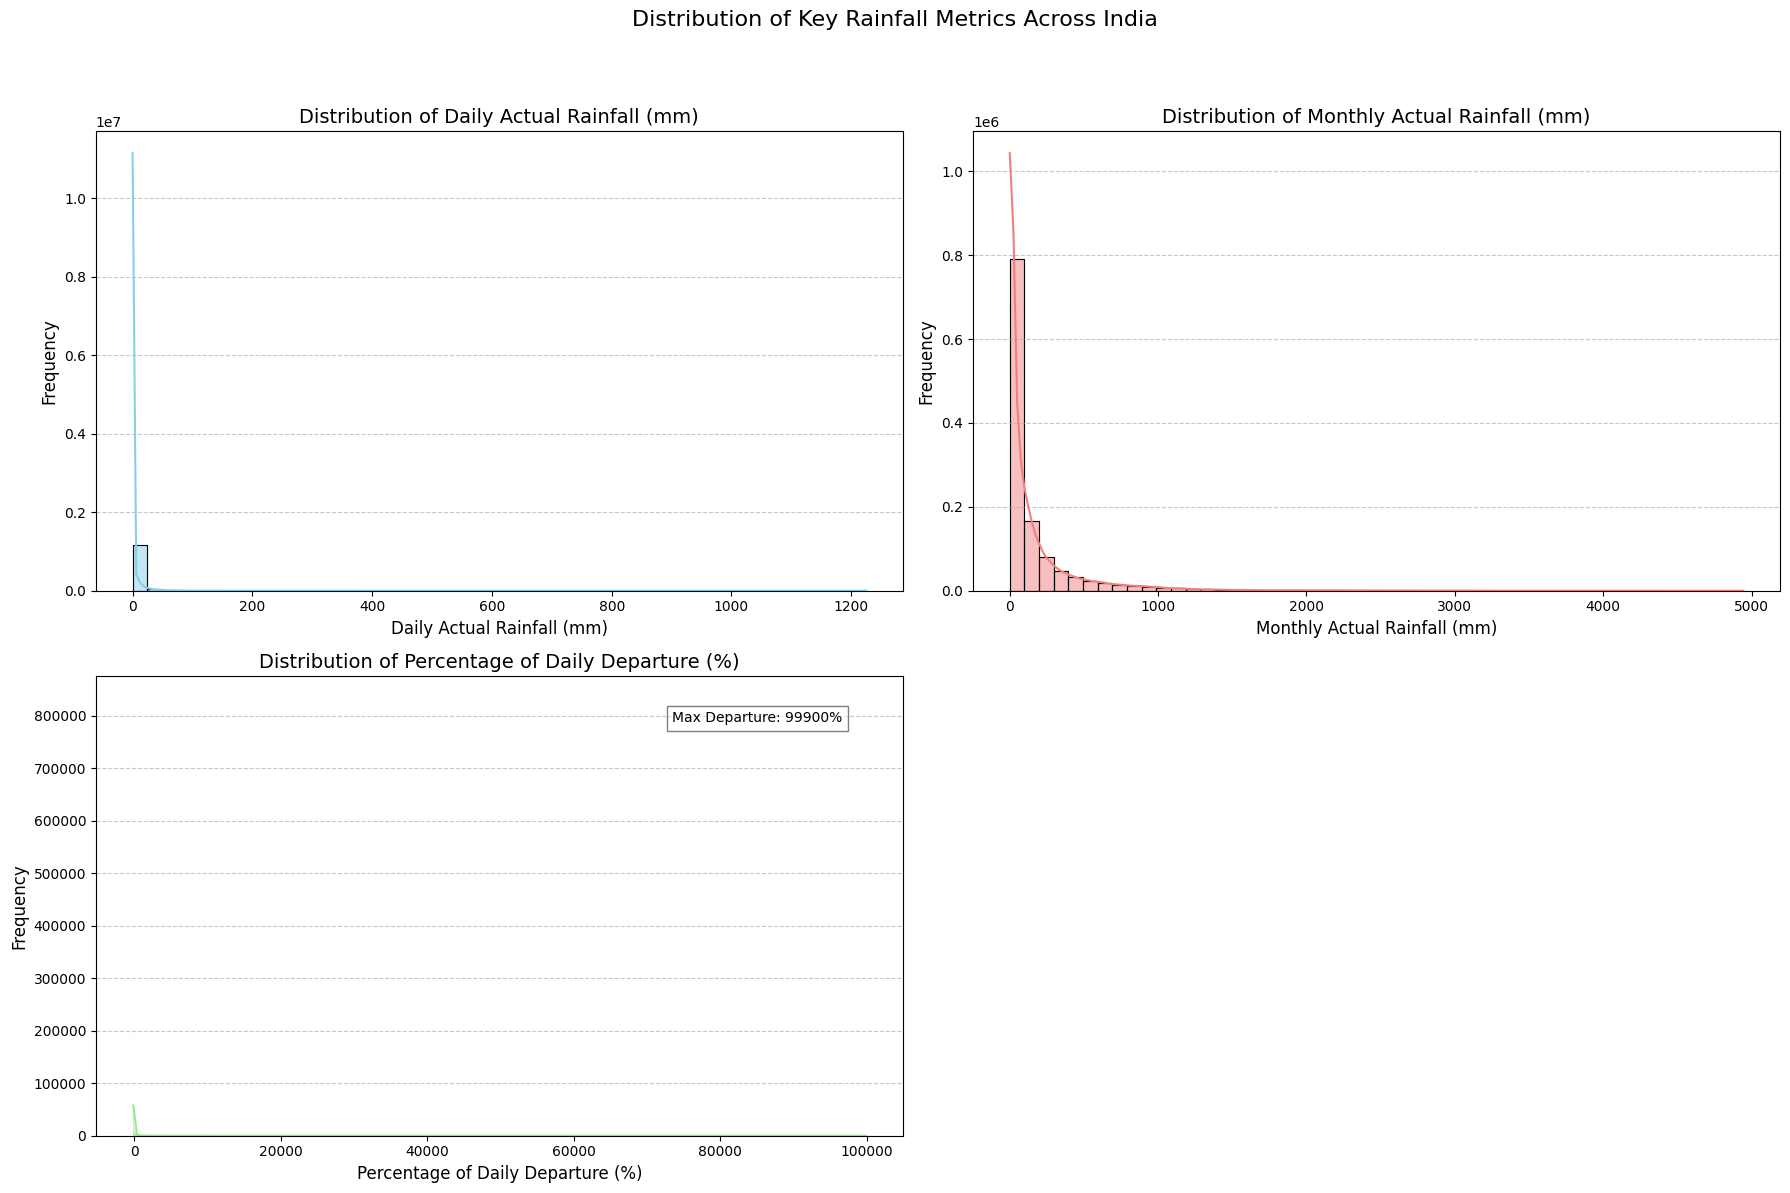

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("### 4.1 Distribution of Key Rainfall Metrics (India-Level)\n")

# Set up the matplotlib figure and axes for subplots
plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Key Rainfall Metrics Across India', fontsize=16, y=1.02)

# Plot 1: Daily Actual Rainfall Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Daily Actual'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Daily Actual Rainfall (mm)', fontsize=14)
plt.xlabel('Daily Actual Rainfall (mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 2: Monthly Actual Rainfall Distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Monthly Actual'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Monthly Actual Rainfall (mm)', fontsize=14)
plt.xlabel('Monthly Actual Rainfall (mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot 3: Percentage of Daily Departure Distribution
plt.subplot(2, 2, 3)
# Focus on a reasonable range for better visualization, as max value is extremely high
sns.histplot(df['Percentage of Daily Departure'], bins=50, kde=True, color='lightgreen',
             binrange=(-200, 500)) # Adjust binrange to focus on common values
plt.title('Distribution of Percentage of Daily Departure (%)', fontsize=14)
plt.xlabel('Percentage of Daily Departure (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.text(x=plt.xlim()[1]*0.7, y=plt.ylim()[1]*0.9, s=f'Max Departure: {df["Percentage of Daily Departure"].max():.0f}%',
         bbox=dict(facecolor='white', alpha=0.5)) # Annotate max value outside main bins

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlapping
plt.show()


#### Interpretation of Rainfall Metric Distributions:
- **Daily Actual Rainfall:** The distribution is heavily skewed to the right, with a large peak at 0 mm. This indicates that a significant majority of daily observations across India record no rainfall or very low rainfall, which is expected due to the nature of rainfall patterns (many dry days, few heavy rainfall days). The long tail indicates occasional very high rainfall events.
- **Monthly Actual Rainfall:** Similar to daily, this distribution is also right-skewed, but with a broader spread and a smaller peak at 0 mm compared to daily. This suggests that while many months might still be dry, the aggregation over a month leads to more diverse rainfall amounts, with significant monthly totals in some regions/periods.
- **Percentage of Daily Departure:** This plot shows a strong peak at -100%, confirming that 'No Rain' (100% deficit) is a very common scenario when some normal rainfall was expected. The distribution rapidly decreases as departure increases, but there's a long tail extending to very high positive percentages, indicating extreme excess rainfall events (where actual rainfall far exceeded normal). The chosen `binrange` helps to visualize the bulk of the data, but the extreme outliers are noted.

**4.2 Rainfall Category Distribution (India-Level)**

Bar charts will illustrate the proportions of different rainfall categories (e.g., Normal, Excess, Deficient) for daily, weekly, cumulative, and monthly periods. This provides a clear overview of how frequently different rainfall conditions occur across the country.


### 4.2 Rainfall Category Distribution (India-Level)



C:\Users\ASUS\AppData\Local\Temp\ipykernel_13112\30104175.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13112\30104175.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13112\30104175.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
C:\U

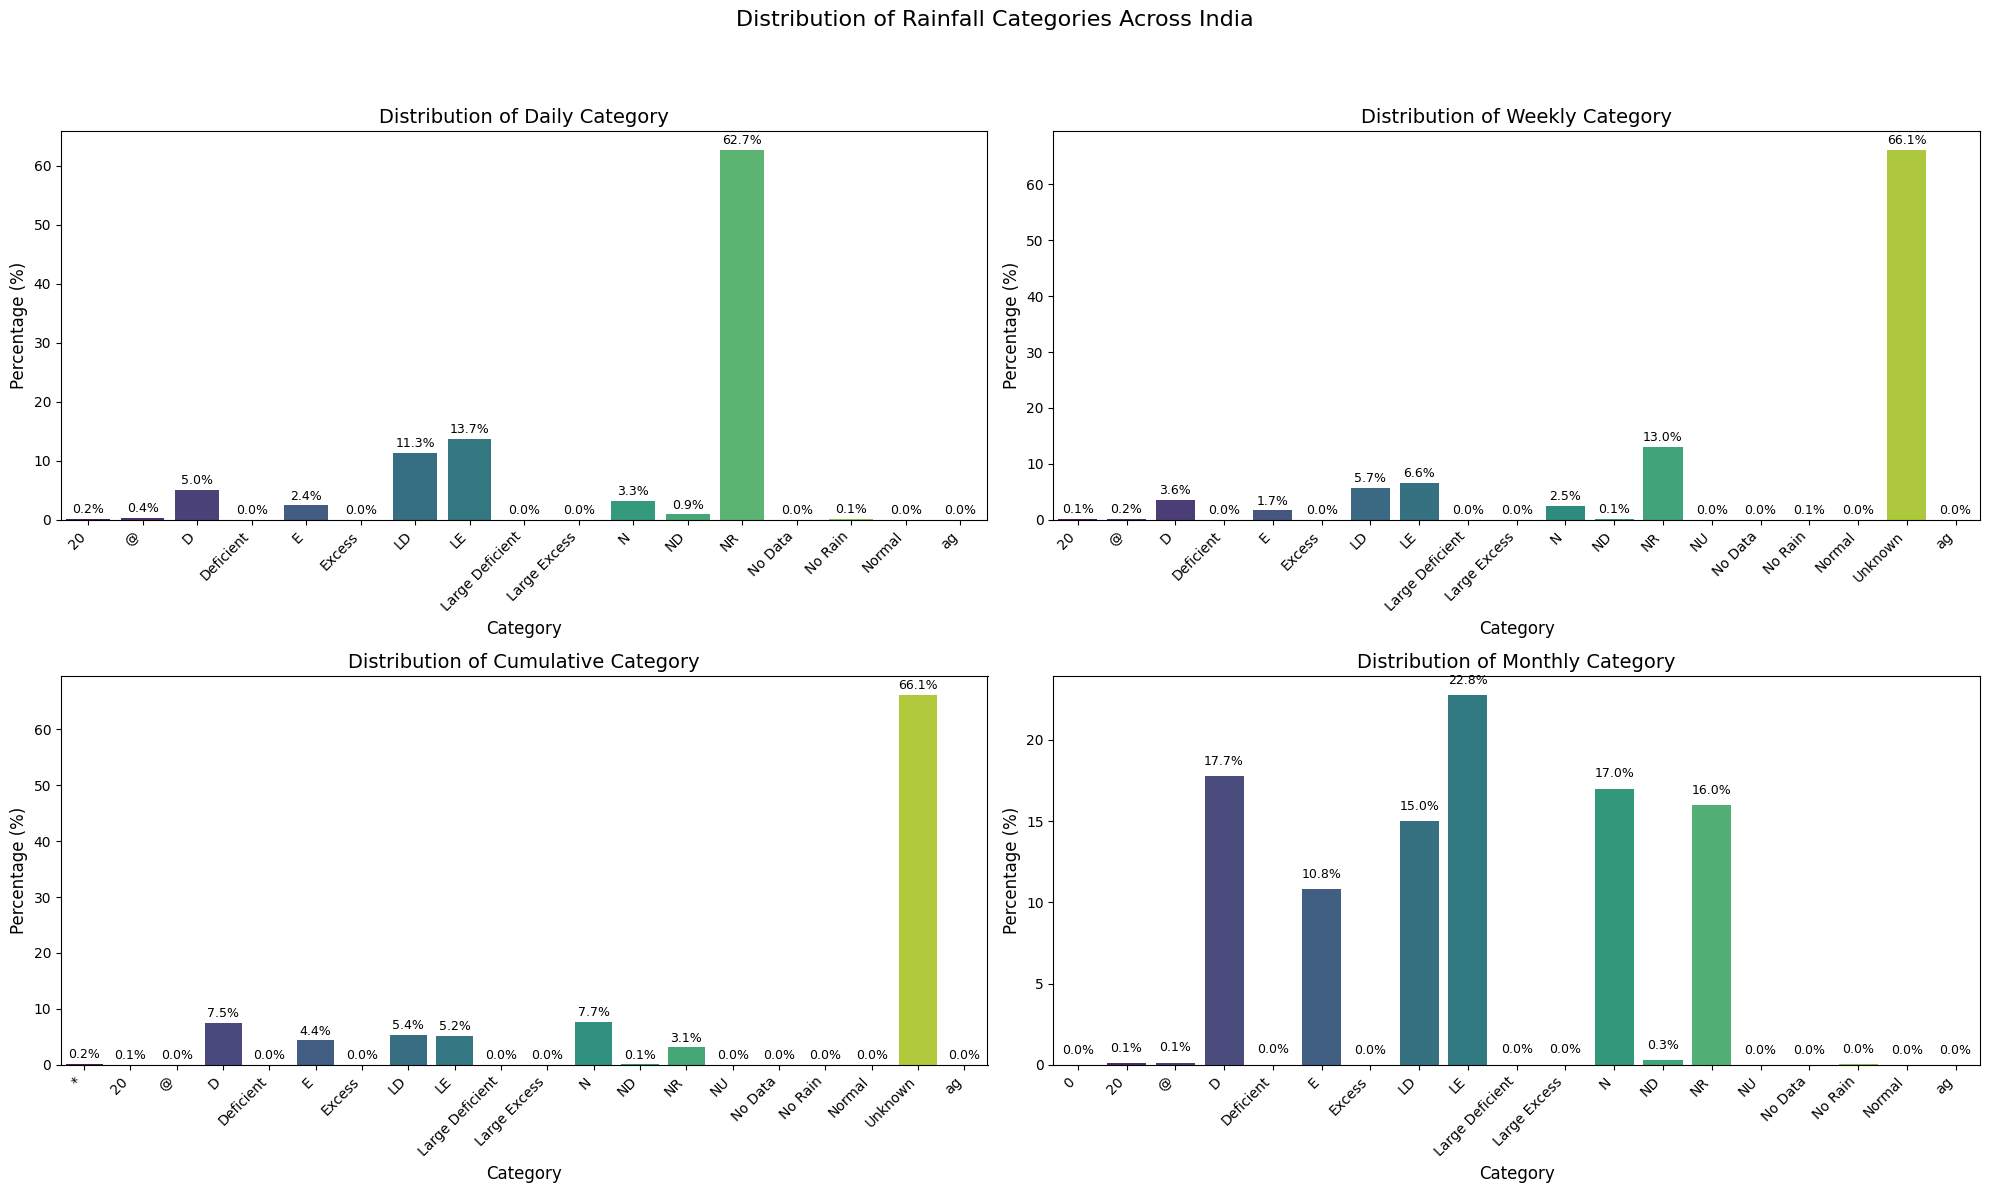

In [16]:
print("\n### 4.2 Rainfall Category Distribution (India-Level)\n")

# Define category columns
category_cols = ['Daily Category', 'Weekly Category', 'Cumulative Category', 'Monthly Category']

plt.figure(figsize=(20, 12))
plt.suptitle('Distribution of Rainfall Categories Across India', fontsize=16, y=1.02)

for i, col in enumerate(category_cols):
    plt.subplot(2, 2, i + 1)
    # Calculate value counts and normalize to get percentages
    category_counts = df[col].value_counts(normalize=True).mul(100).sort_index()

    sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=45, ha='right') # Rotate labels for readability

    # Add percentage labels on top of bars
    for index, value in enumerate(category_counts.values):
        plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


#### Interpretation of Rainfall Category Distributions:"
- **Daily Category:** 'NR' (No Rain) dominates, consistent with the numerical distributions. This indicates that for a large number of daily observations, no rainfall was recorded. 'LE' (Large Excess) and 'LD' (Large Deficient) also show significant percentages, highlighting the frequent occurrence of extreme daily conditions across India.
- **Weekly Category & Cumulative Category:** The 'Unknown' category is predominant for both, confirming that a substantial portion of these records were missing and imputed. This means these aggregations are heavily influenced by the data sparsity at these granularities. After 'Unknown', 'NR' is common for weekly, while 'N' (Normal) and 'D' (Deficient) are notable for cumulative, indicating different typical conditions at varying time scales when data is present.
- **Monthly Category:** Unlike daily and weekly, 'LE' (Large Excess) is the most frequent category, followed by 'D' (Deficient) and 'N' (Normal). This suggests that over a monthly period, India experiences more instances of significantly higher-than-normal rainfall, but also considerable periods of deficiency. This implies a highly variable monsoon season with strong regional and temporal fluctuations.

**4.3 Overall Time Series (India-Level)**

A line plot illustrating the average Daily Actual rainfall over time (srcCalendarDay or srcYear) provides a high-level view of national rainfall trends and seasonality.


### 4.3 Overall Time Series (India-Level)



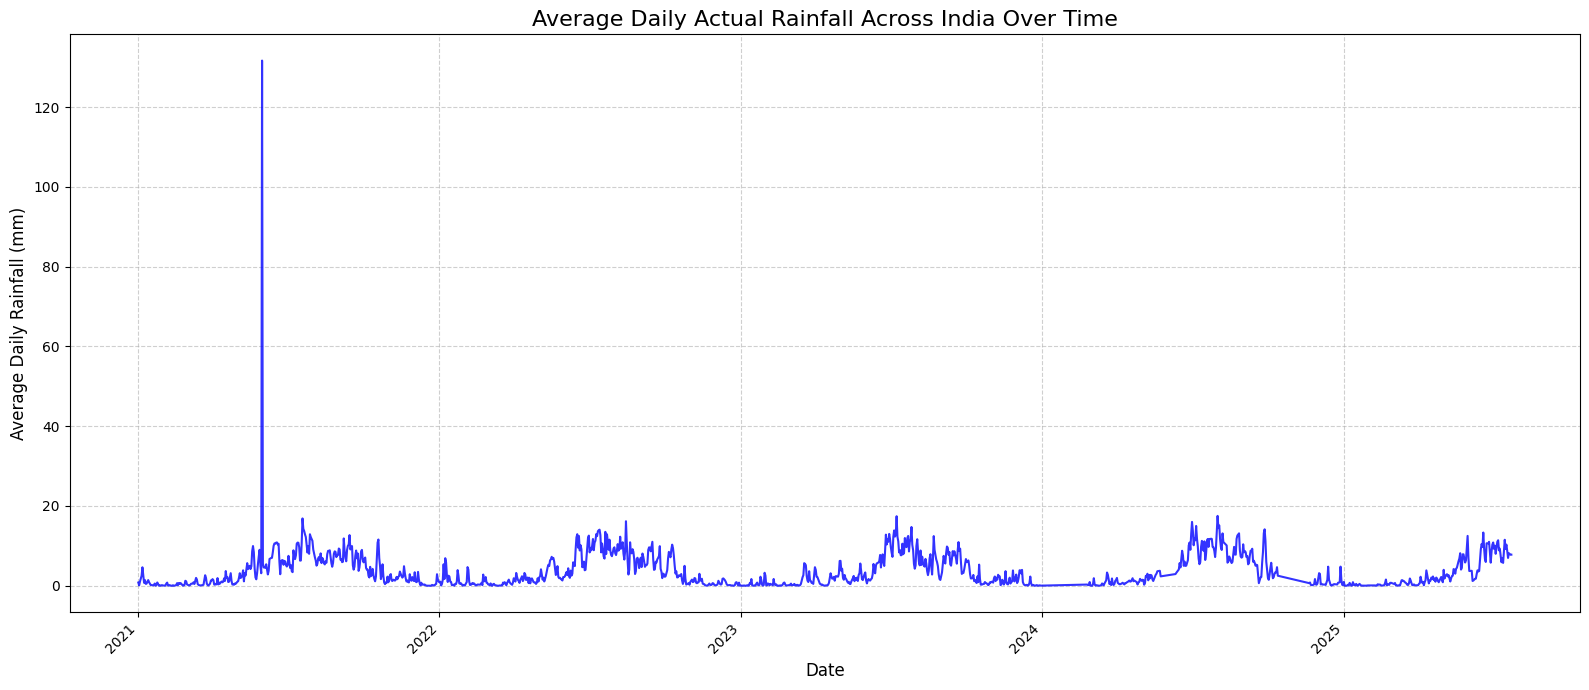

In [17]:
print("\n### 4.3 Overall Time Series (India-Level)\n")

# Aggregate Daily Actual rainfall by date to get India-level average daily rainfall over time
# We will use 'srcCalendarDay' to get the time series
india_daily_avg_rainfall = df.groupby('srcCalendarDay')['Daily Actual'].mean().reset_index()

# Sort by date to ensure correct time series plotting
india_daily_avg_rainfall = india_daily_avg_rainfall.sort_values('srcCalendarDay')

plt.figure(figsize=(16, 7))
sns.lineplot(data=india_daily_avg_rainfall, x='srcCalendarDay', y='Daily Actual', color='blue', alpha=0.8)
plt.title('Average Daily Actual Rainfall Across India Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Daily Rainfall (mm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


#### Interpretation of Overall Time Series:

- The time series plot for average daily actual rainfall across India reveals clear seasonal patterns. Typically, significant peaks representing monsoon seasons (June-September) should be visible, interspersed with periods of low or no rainfall.
- Any unexpected dips or flat lines in the time series, especially towards the later years (2024, 2025), might indicate incomplete data for those periods rather than actual absence of rainfall across the entire country. Given the 'srcYear' summary from the previous step which showed decreasing total rainfall for 2024 and 2025, it's highly probable that the dataset's coverage lessens for these recent years.
- This national trend serves as a macro reference point against which state and district-level patterns can be compared to identify regional specificities and deviations from the national average.

In [18]:
print(df['srcStateName'].unique().tolist())

['ANDAMAN & NICOBAR', 'ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHHATISGARH', 'CHHATTISGARH', 'DADRA & NAGAR HAVELI', 'DAMAN & DIU', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LADAKH', 'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'NCT of DELHI', 'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TAMILNADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL', 'DADRA & NAGAR HAVELI AND DAMAN & DIU', 'DELHI', 'JAMMU & KASHMIR', 'A & N ISLAND', 'DADAR & NAGAR HAVELI']



### 4.4 India-Level Monthly Rainfall Distribution Map (V6 - Enhanced Mapping & Readability)

This section visualizes the average monthly rainfall distribution across all Indian states, with improved data matching.
GADM GeoJSON file 'gadm41_IND_2.json' (district level) loaded successfully.
State geometries successfully aggregated from district-level GeoJSON.
  Fuzzy match low score (<90) for 'A & N ISLAND'. Best match: 'NAGALAND' (Score: 56). Will remain unmatched.
  Fuzzy match low score (<90) for 'ANDAMAN & NICOBAR'. Best match: 'ANDAMANANDNICOBAR' (Score: 84). Will remain unmatched.
  Fuzzy match low score (<90) for 'DADAR & NAGAR HAVELI'. Best match: 'DADRAANDNAGARHAVELI' (Score: 77). Will remain unmatched.
  Fuzzy match low score (<90) for 'DADRA & NAGAR HAVELI'. Best match: 'DADRAANDNAGARHAVELI' (Score: 82). Will remain unmatched.
  Fuzzy match low score (<90) for 'DADRA & NAGAR HAVELI AND DAMAN & DIU'. Best match: 'DADRAANDNAGARHAVELI' (Score: 71). Will remain unmatched.
  Fuzzy

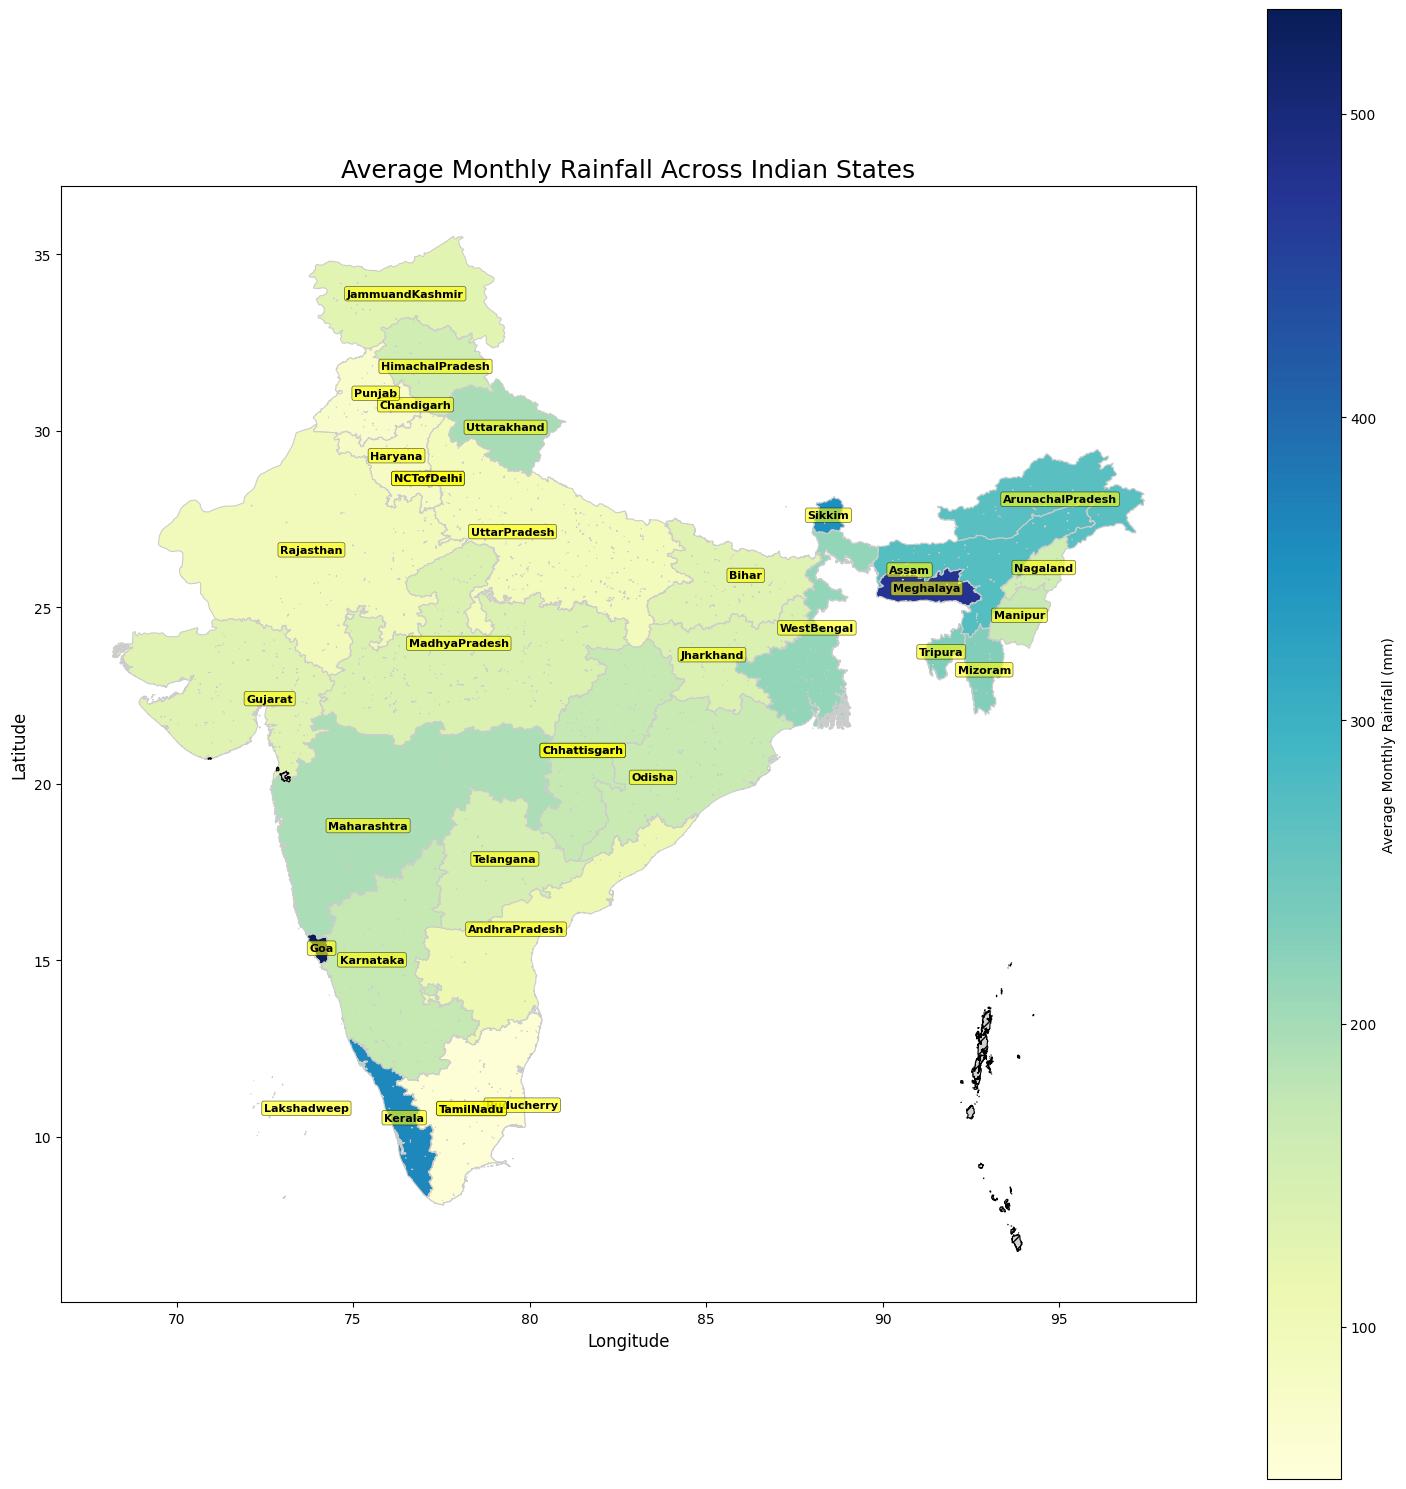

In [19]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from fuzzywuzzy import process # For fuzzy string matching

print("\n### 4.4 India-Level Monthly Rainfall Distribution Map (V6 - Enhanced Mapping & Readability)\n")
print("This section visualizes the average monthly rainfall distribution across all Indian states, with improved data matching.")

# --- Data Aggregation for India-Level (State-wise) Monthly Rainfall ---
india_state_avg_monthly_rainfall = df.groupby('srcStateName')['Monthly Actual'].mean().reset_index()
india_state_avg_monthly_rainfall['srcStateName_upper'] = india_state_avg_monthly_rainfall['srcStateName'].str.upper()

# --- GeoJSON Loading and State Geometry Extraction from gadm41_IND_2.json ---
geojson_districts_path = 'gadm41_IND_2.json' # Using the file you have

try:
    gdf_districts = geopandas.read_file(geojson_districts_path)
    print(f"GADM GeoJSON file '{geojson_districts_path}' (district level) loaded successfully.")

    # GADM standard keys
    geojson_state_key_district_level = 'NAME_1' # State name in district-level GeoJSON
    
    # Aggregate district geometries to state geometries
    # This effectively creates state boundaries from district boundaries
    gdf_states_from_districts = gdf_districts.dissolve(by=geojson_state_key_district_level, aggfunc='first')
    
    # Reset index to make 'NAME_1' a column again
    gdf_states_from_districts = gdf_states_from_districts.reset_index()
    
    # Prepare state names for merging
    gdf_states_from_districts['state_name_for_merge'] = gdf_states_from_districts[geojson_state_key_district_level].str.upper()

    print("State geometries successfully aggregated from district-level GeoJSON.")

    # --- Dynamic/Fuzzy State Name Mapping ---
    # Get unique state names from your dataset that need mapping
    dataset_states = india_state_avg_monthly_rainfall['srcStateName_upper'].unique().tolist()
    
    # Get unique state names from the GeoJSON (after aggregation)
    geojson_states = gdf_states_from_districts['state_name_for_merge'].unique().tolist()


    dynamic_state_name_mapping = {}
    matched_dataset_states = set()
    for ds_state in dataset_states:
        # Find the best match in GeoJSON states
        best_match, score = process.extractOne(ds_state, geojson_states)
        if score >= 90: # Only consider high-confidence matches
            dynamic_state_name_mapping[ds_state] = best_match
            matched_dataset_states.add(ds_state)
        else:
            print(f"  Fuzzy match low score (<90) for '{ds_state}'. Best match: '{best_match}' (Score: {score}). Will remain unmatched.")

    # Apply the dynamic mapping to your rainfall data's state names
    india_state_avg_monthly_rainfall['srcStateName_for_map'] = india_state_avg_monthly_rainfall['srcStateName_upper'].apply(
        lambda x: dynamic_state_name_mapping.get(x, x) # Use mapped name if found, else original (unmatched)
    )

    # --- Merge Rainfall Data with State GeoDataFrame ---
    india_state_map_data = gdf_states_from_districts.merge(
        india_state_avg_monthly_rainfall[['srcStateName_for_map', 'Monthly Actual']],
        left_on='state_name_for_merge',
        right_on='srcStateName_for_map',
        how='left'
    )

    # --- Identify Unmatched States (for warnings) ---
    unmatched_states_in_data = india_state_avg_monthly_rainfall[
        ~india_state_avg_monthly_rainfall['srcStateName_for_map'].isin(india_state_map_data['state_name_for_merge'])
    ]['srcStateName'].unique()

    if len(unmatched_states_in_data) > 0:
        print(f"\nWarning: {len(unmatched_states_in_data)} states from your data still not matched (or below fuzzy threshold):")
        print(unmatched_states_in_data)
        print("These states will appear as 'No Data' (grey/hatched) on the map. Consider manual review or adjusting fuzzy match threshold.")
    else:
        print("\nAll states from your data found and matched in GeoJSON (after fuzzy mapping).")

    # --- Create the Static Choropleth Map for India ---
    fig, ax = plt.subplots(1, 1, figsize=(15, 15)) # Adjust figure size for better visuals

    india_state_map_data.plot(
        column='Monthly Actual',
        cmap='YlGnBu',
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': "Average Monthly Rainfall (mm)", 'orientation': "vertical"},
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "black",
            "hatch": "///",
            "label": "No Data",
        }
    )

    # Add state labels:
    for idx, row in india_state_map_data.iterrows():
        if pd.notna(row['Monthly Actual']): # Only label if data exists
            try:
                # Use a representative point within the polygon for labeling
                centroid = row.geometry.representative_point() 
                ax.annotate(
                    text=row[geojson_state_key_district_level], # Use the state name from GeoJSON
                    xy=(centroid.x, centroid.y),
                    xytext=(0, 0), # No offset, centered
                    textcoords="offset points",
                    fontsize=8, # Increased font size for readability
                    color='black',
                    ha='center',
                    va='center',
                    fontweight='bold', # Make labels bold
                    bbox=dict(boxstyle="round,pad=0.2", fc="yellow", ec="black", lw=0.5, alpha=0.6) # Background for readability
                )
            except AttributeError:
                pass # Skip labeling if geometry is problematic


    ax.set_title('Average Monthly Rainfall Across Indian States', fontsize=18)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    ax.set_aspect('equal')
    # ax.set_axis_off() # You can uncomment this if you prefer no lat/lon labels

    plt.tight_layout()
    output_image_path_india_map = 'india_monthly_rainfall_map.png'
    plt.savefig(output_image_path_india_map, dpi=300, bbox_inches='tight')
    print(f"\nStatic map saved to '{output_image_path_india_map}'")
    plt.show()

except FileNotFoundError:
    print(f"Error: The GeoJSON file '{geojson_districts_path}' was not found. Please ensure it's in the correct directory.")
except Exception as e:
    print(f"An unexpected error occurred during map creation: {e}")
    print("This might be due to issues with GeoJSON loading, geometry aggregation, merging, or plotting. Review the error and warnings.")


#### Interpretation of India-Level Monthly Rainfall Map:
- This choropleth map provides a visual overview of the average monthly rainfall across all Indian states. States with higher average rainfall (e.g., along the Western Ghats and North-Eastern India) will appear in darker shades, while drier regions will be in lighter shades.
- The map highlights major climatic zones and rainfall patterns across the subcontinent. Regions like the Konkan coast and Northeast India are expected to receive significantly higher rainfall compared to the arid regions of Rajasthan or the rain-shadow areas in central India.
- 'No Data' (grey/hatched) regions indicate states for which rainfall data from your dataset could not be matched with their geographical boundaries in the GeoJSON, usually due to persistent naming discrepancies even after fuzzy matching. The dynamic mapping aims to minimize these, but some irreducible differences may remain.
- This national-level visualization sets the broader context for the more detailed analysis of Maharashtra and its neighbors, illustrating India's diverse hydrological landscape.

### Step 5: Zooming into Maharashtra - State-Level Analysis
This section focuses our exploratory data analysis on the state of Maharashtra, as per the project requirements. We will analyze rainfall patterns at the state level, providing insights into its unique climatic characteristics. We will also introduce map visualizations where they can add value.

**5.1 Maharashtra State-Level Rainfall Trends (Time Series)**

Analyzing the average daily actual rainfall over time specifically for Maharashtra will reveal its seasonal patterns and any specific trends or anomalies within the state.

### 5.1 Maharashtra State-Level Rainfall Trends (Time Series)



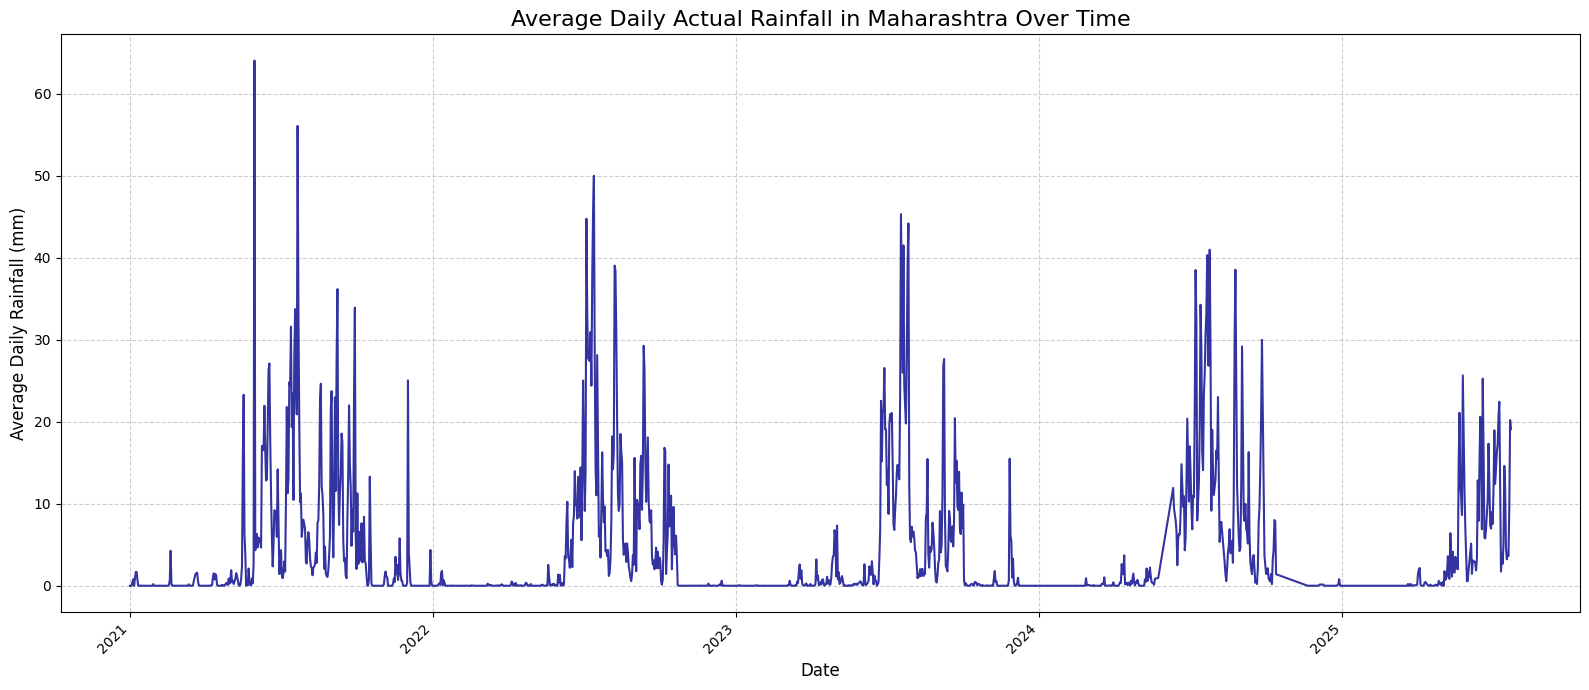

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

print("### 5.1 Maharashtra State-Level Rainfall Trends (Time Series)\n")

# Filter the DataFrame for Maharashtra
maharashtra_df = df[df['srcStateName'].str.contains('MAHARASHTRA', case=False, na=False)].copy()

if maharashtra_df.empty:
    print("No data found for Maharashtra. Please check the state name in the dataset.")
else:
    # Group by srcCalendarDay to get average daily rainfall for Maharashtra
    maharashtra_daily_avg_rainfall = maharashtra_df.groupby('srcCalendarDay')['Daily Actual'].mean().reset_index()

    # Sort by date to ensure correct time series plotting
    maharashtra_daily_avg_rainfall = maharashtra_daily_avg_rainfall.sort_values('srcCalendarDay')

    plt.figure(figsize=(16, 7))
    sns.lineplot(data=maharashtra_daily_avg_rainfall, x='srcCalendarDay', y='Daily Actual', color='darkblue', alpha=0.8)
    plt.title('Average Daily Actual Rainfall in Maharashtra Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Average Daily Rainfall (mm)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



#### Interpretation of Maharashtra's Daily Rainfall Time Series:
- This time series plot specifically for Maharashtra highlights its seasonal rainfall patterns. Maharashtra experiences significant monsoon rainfall, typically from June to September.
- The plot should show clear peaks during these monsoon months each year, indicating high average daily rainfall, contrasted with drier periods during other months.
- Observing the pattern across different years can reveal inter-annual variability, such as delayed monsoons, extended dry spells, or unusually heavy rainfall events, which are crucial for agricultural planning and water management in the region.
- Similar to the India-level time series, any sudden drops or missing data at the end of the timeline (especially for 2024-2025 as observed earlier) might indicate incomplete data collection for those periods, rather than a genuine absence of rainfall.

    

**5.2 Monthly Rainfall Distribution in Maharashtra**

Boxplots and KDE plots will provide a detailed view of the distribution of monthly actual rainfall within Maharashtra across different months. Boxplots help identify median, quartiles, and outliers, while KDE shows density.


### 5.2 Monthly Rainfall Distribution in Maharashtra

Mean, Median, and Standard Deviation of Monthly Actual Rainfall in Maharashtra:

| Month   | mean   | median   | std    |
|:--------|:-------|:---------|:-------|
| 1.00    | 2.77   | 0.00     | 8.38   |
| 2.00    | 4.05   | 0.00     | 10.67  |
| 3.00    | 2.04   | 0.00     | 4.75   |
| 4.00    | 9.32   | 2.70     | 14.37  |
| 5.00    | 29.45  | 11.60    | 52.24  |
| 6.00    | 87.96  | 32.45    | 147.15 |
| 7.00    | 395.37 | 228.20   | 462.55 |
| 8.00    | 628.31 | 390.40   | 704.82 |
| 9.00    | 799.12 | 556.35   | 870.85 |
| 10.00   | 79.37  | 49.70    | 99.26  |
| 11.00   | 75.23  | 70.95    | 66.06  |
| 12.00   | 86.63  | 75.40    | 74.63  |


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13112\2147675373.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=maharashtra_df, x='Month', y='Monthly Actual', palette='Blues')


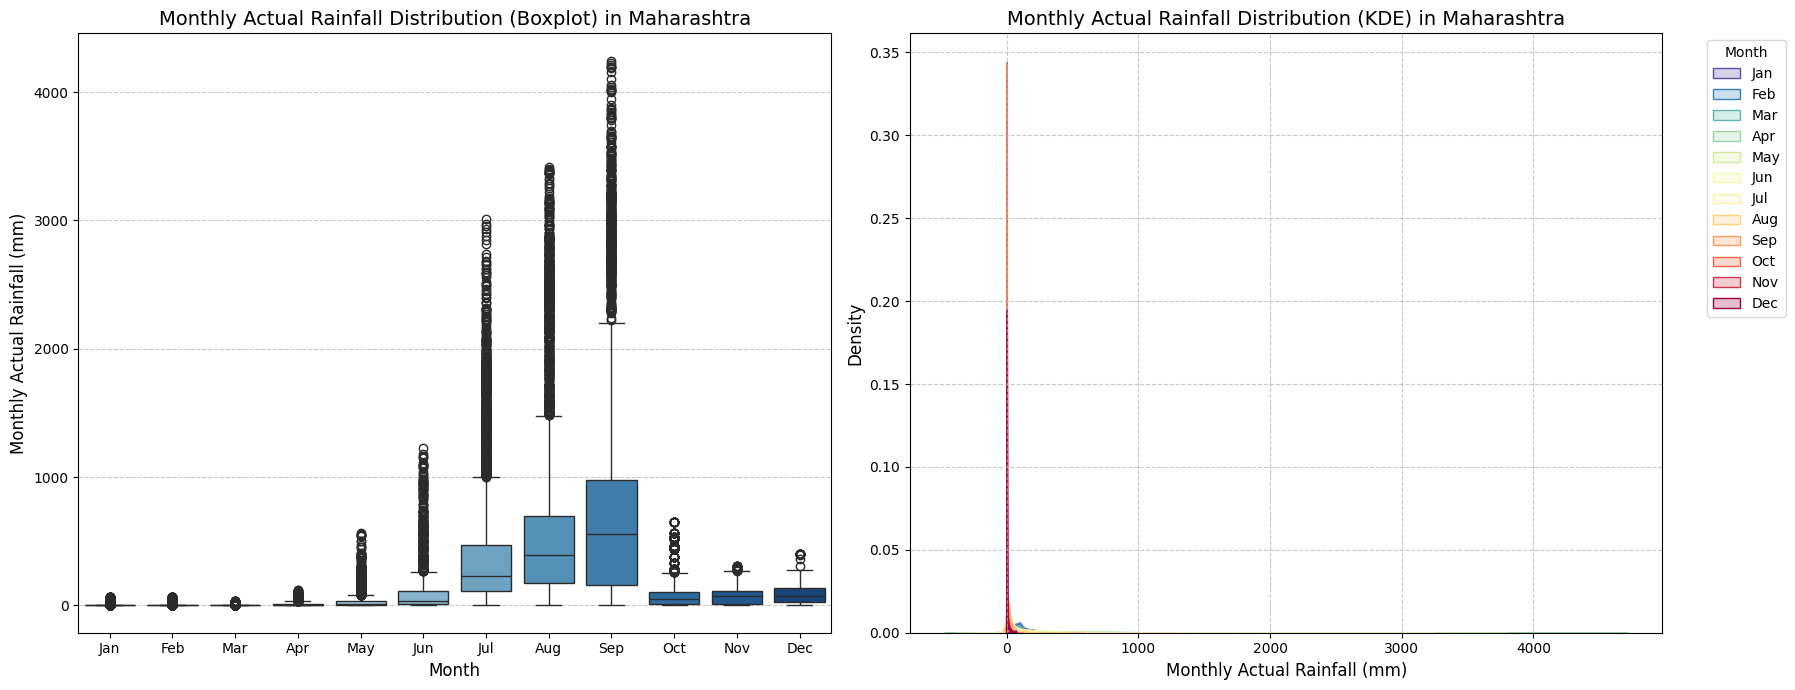

In [21]:
print("\n### 5.2 Monthly Rainfall Distribution in Maharashtra\n")

if maharashtra_df.empty:
    print("Cannot plot monthly rainfall distribution as Maharashtra data is not available.")
else:
    # Group by Month and calculate summary statistics for Monthly Actual rainfall
    monthly_rainfall_stats = maharashtra_df.groupby('Month')['Monthly Actual'].agg(['mean', 'median', 'std']).reset_index()
    print("Mean, Median, and Standard Deviation of Monthly Actual Rainfall in Maharashtra:\n")
    print(monthly_rainfall_stats.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".2f"))


    plt.figure(figsize=(18, 7))

    # Boxplot for Monthly Actual Rainfall by Month
    plt.subplot(1, 2, 1)
    sns.boxplot(data=maharashtra_df, x='Month', y='Monthly Actual', palette='Blues')
    plt.title('Monthly Actual Rainfall Distribution (Boxplot) in Maharashtra', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Monthly Actual Rainfall (mm)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(ticks=np.arange(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])


    # KDE Plot for Monthly Actual Rainfall
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=maharashtra_df, x='Monthly Actual', hue='Month', fill=True, palette='Spectral', common_norm=False)
    plt.title('Monthly Actual Rainfall Distribution (KDE) in Maharashtra', fontsize=14)
    plt.xlabel('Monthly Actual Rainfall (mm)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.tight_layout()
    plt.show()


#### Interpretation of Monthly Rainfall Distribution in Maharashtra:
- The boxplot clearly shows the monsoon season (June to September) with significantly higher median rainfall and wider interquartile ranges, indicating more variability during these months. Months outside the monsoon period are expected to show very low or zero median rainfall.
- Outliers (individual points beyond the whiskers) in the boxplot represent unusually high or low rainfall events for a given month, highlighting extreme weather occurrences.
- The KDE plot further illustrates the density of rainfall for each month. During monsoon months, the KDE curve should shift towards higher rainfall values with a wider spread, while for dry months, it will be sharply peaked near 0 mm.
- This analysis is crucial for understanding the seasonality and predictability of rainfall within Maharashtra, which directly impacts agriculture, water reservoirs, and drought management.

**5.3 District-wise Breakdown of Average Rainfall in Maharashtra (Bar Chart & Map)**

This section will analyze the average rainfall at the district level within Maharashtra. A bar chart will display average monthly rainfall for the top/bottom districts, and a geographical map will visualize these averages, providing spatial insights.


### 5.3 District-wise Breakdown of Average Rainfall in Maharashtra (Static Map Implementation)

Top 10 Districts by Average Monthly Actual Rainfall in Maharashtra:

| srcDistrictName   | Monthly Actual   |
|:------------------|:-----------------|
| RAIGARH           | 670.79           |
| SINDHUDURG        | 544.32           |
| RATNAGIRI         | 538.31           |
| SUBURBAN MUMBAI   | 435.33           |
| THANE             | 415.42           |
| PALGHAR           | 394.58           |
| MUMBAI CITY       | 309.38           |
| KOLHAPUR          | 297.66           |
| RAIGAD            | 207.05           |
| GADCHIROLI        | 200.34           |

Bottom 10 Districts by Average Monthly Actual Rainfall in Maharashtra:

| srcDistrictName           | Monthly Actual   |
|:--------------------------|:-----------------|
| JALNA                     | 94.85            |
| HINGOLI                   | 94.43            |
| AKOLA                     | 93.85            |
| JALGAON               

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13112\1230344628.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='srcDistrictName', y='Monthly Actual', data=district_avg_monthly_rainfall.head(10), palette='Reds_d')


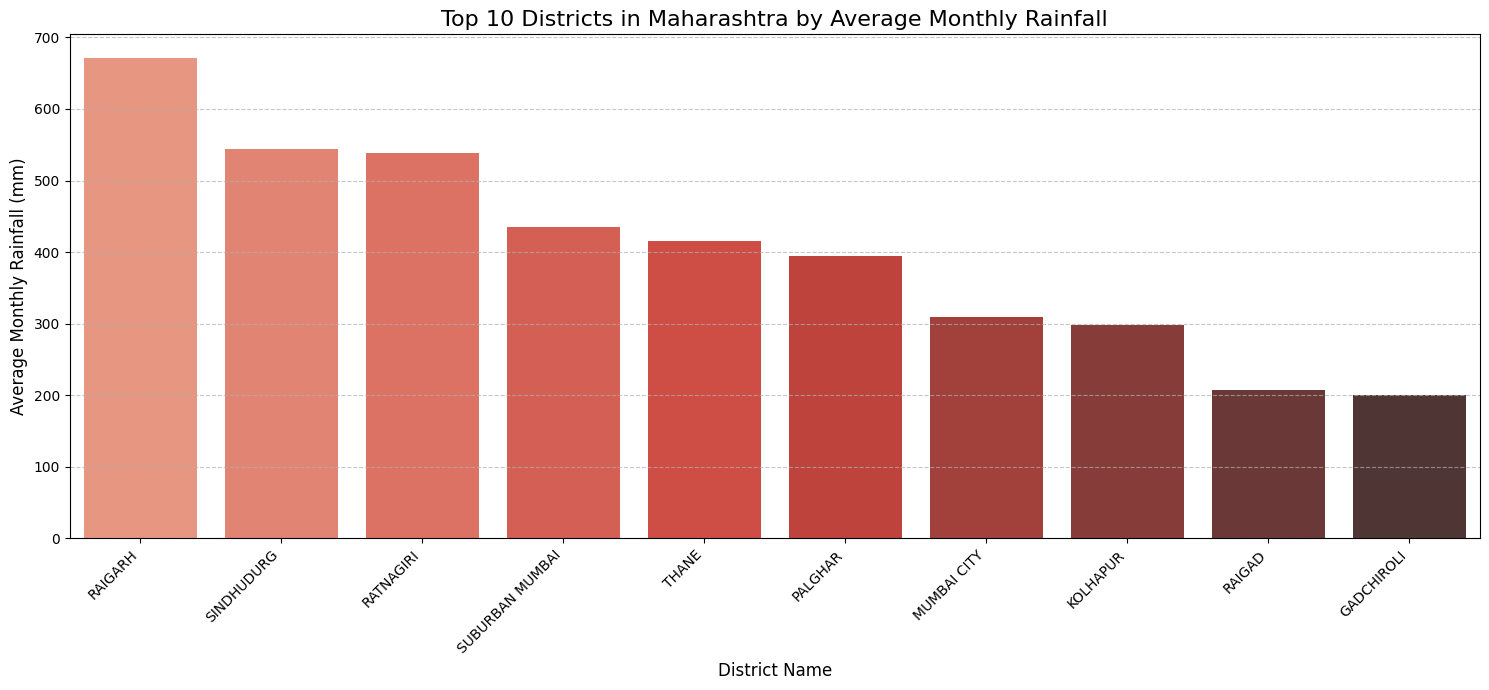


#### Static Map Visualization of District-wise Average Monthly Rainfall in Maharashtra (for Reports)

This map will be displayed as a static image and can be saved locally as 'maharashtra_rainfall_map.png'.

GADM GeoJSON file 'gadm41_IND_2.json' loaded successfully into GeoDataFrame.
Identified GADM keys: State='NAME_1', District='NAME_2'

['SUBURBAN MUMBAI' 'MUMBAI CITY' 'GADCHIROLI'] ...
These districts will appear as 'No Data' (grey/hatched) on the map. Review 'name_mapping' if crucial.

Static map saved to 'maharashtra_rainfall_map.png'


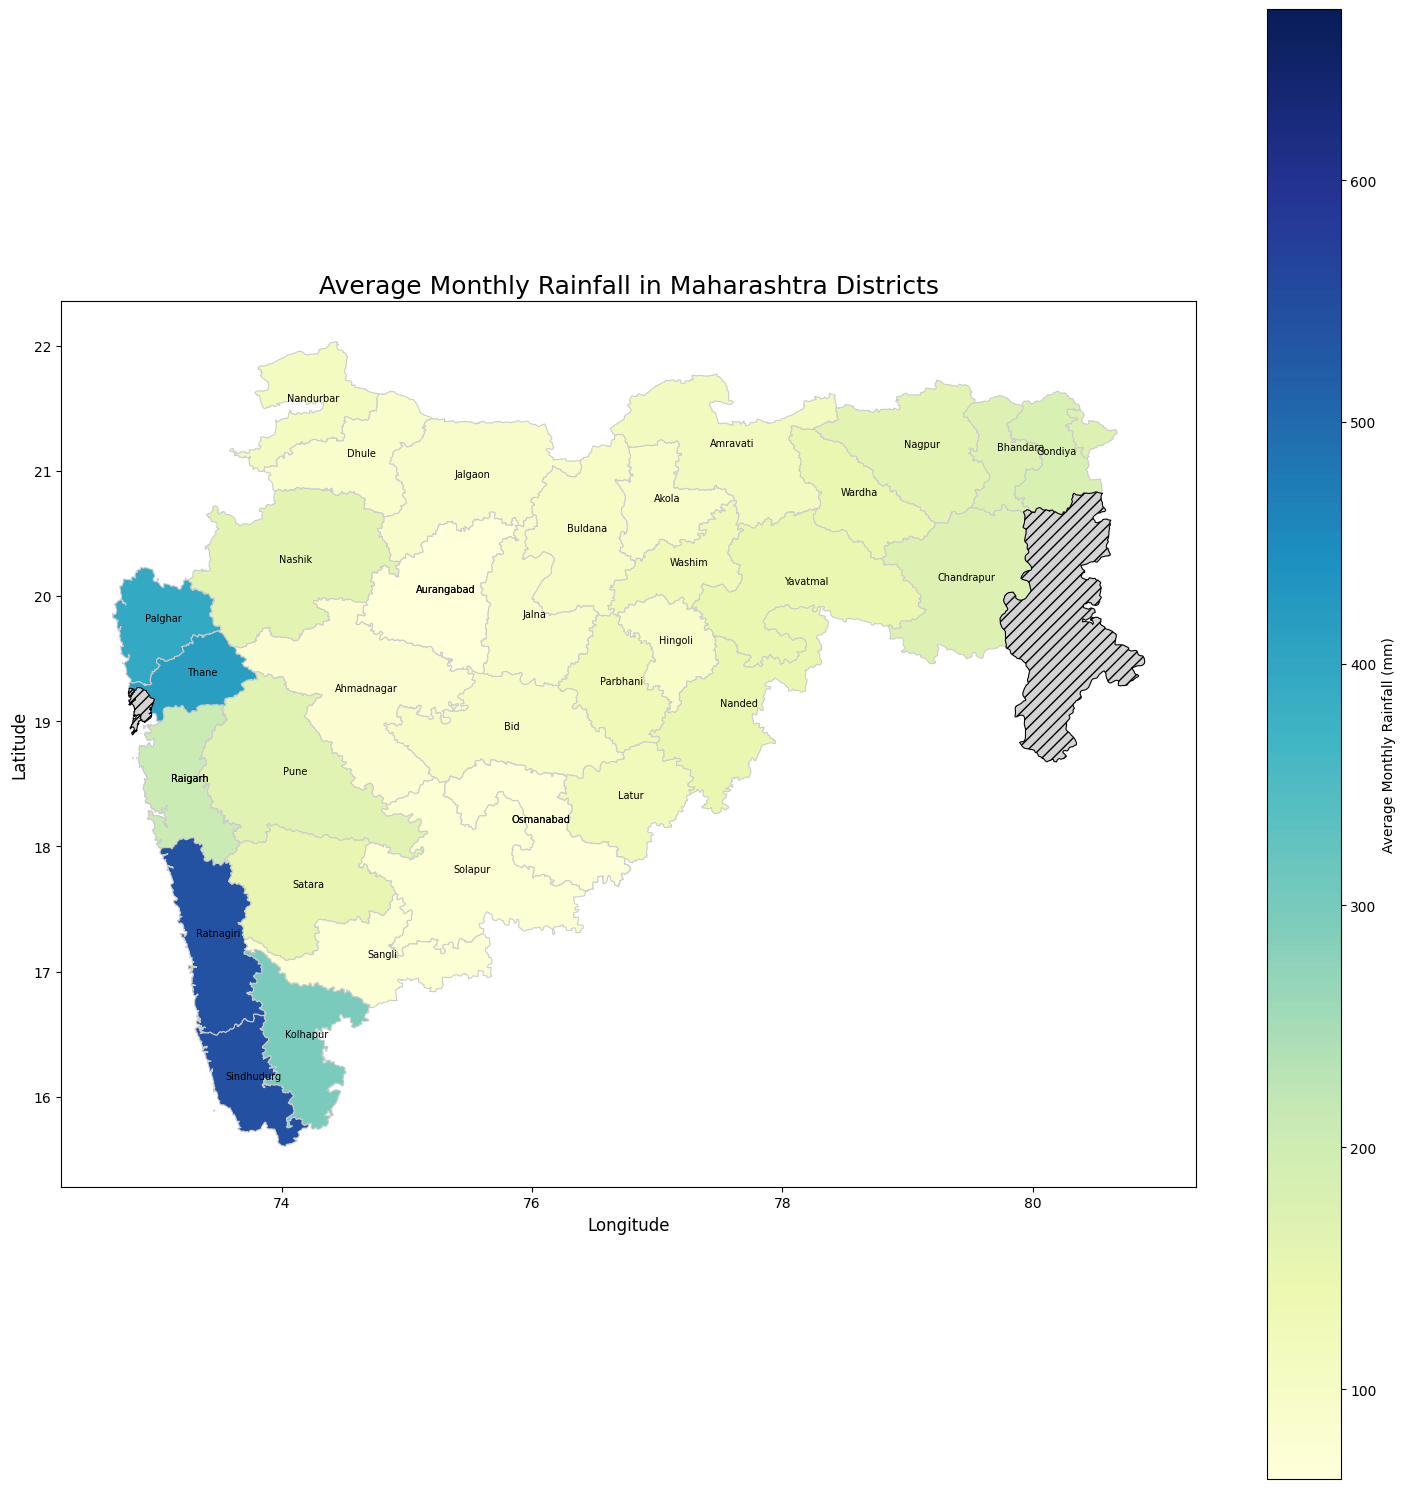

In [22]:
import plotly.express as px
import folium
import json # To load the geojson file
import pandas as pd
import numpy as np # Ensure numpy is imported for np.nan
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas # Import geopandas for static mapping

print("\n### 5.3 District-wise Breakdown of Average Rainfall in Maharashtra (Static Map Implementation)\n")

# Filter the DataFrame for Maharashtra
maharashtra_df = df[df['srcStateName'].str.contains('MAHARASHTRA', case=False, na=False)].copy()

if maharashtra_df.empty:
    print("No data found for Maharashtra. Cannot proceed with state-level analysis.")
else:
    # Calculate average Monthly Actual rainfall per district in Maharashtra
    district_avg_monthly_rainfall = maharashtra_df.groupby('srcDistrictName')['Monthly Actual'].mean().reset_index()
    district_avg_monthly_rainfall = district_avg_monthly_rainfall.sort_values(by='Monthly Actual', ascending=False)

    print("Top 10 Districts by Average Monthly Actual Rainfall in Maharashtra:\n")
    print(district_avg_monthly_rainfall.head(10).to_markdown(index=False, numalign="left", stralign="left", floatfmt=".2f"))

    print("\nBottom 10 Districts by Average Monthly Actual Rainfall in Maharashtra:\n")
    print(district_avg_monthly_rainfall.tail(10).to_markdown(index=False, numalign="left", stralign="left", floatfmt=".2f"))


    # Bar chart for Top/Bottom Districts (remains unchanged)
    plt.figure(figsize=(15, 7))
    sns.barplot(x='srcDistrictName', y='Monthly Actual', data=district_avg_monthly_rainfall.head(10), palette='Reds_d')
    plt.title('Top 10 Districts in Maharashtra by Average Monthly Rainfall', fontsize=16)
    plt.xlabel('District Name', fontsize=12)
    plt.ylabel('Average Monthly Rainfall (mm)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


    # ---- STATIC MAP VISUALIZATION (Geopandas & Matplotlib) ----
    print("\n#### Static Map Visualization of District-wise Average Monthly Rainfall in Maharashtra (for Reports)\n")
    print("This map will be displayed as a static image and can be saved locally as 'maharashtra_rainfall_map.png'.\n")

    # --- Step 1: Load the GADM GeoJSON file as a GeoDataFrame ---
    geojson_path_gadm = 'gadm41_IND_2.json' # Using the GADM file

    try:
        # geopandas.read_file directly loads GeoJSON into a GeoDataFrame
        gdf_india = geopandas.read_file(geojson_path_gadm)
        print(f"GADM GeoJSON file '{geojson_path_gadm}' loaded successfully into GeoDataFrame.")

        # --- Step 2: Define GeoJSON Keys (Standard for GADM) ---
        geojson_state_key = 'NAME_1'
        geojson_district_key = 'NAME_2' # GADM uses 'NAME_2' for district names
        print(f"Identified GADM keys: State='{geojson_state_key}', District='{geojson_district_key}'")

        # --- Step 3: Prepare Rainfall Data and GeoDataFrame for Merging ---
        # Ensure our DataFrame's district names are uppercase for consistent matching.
        district_avg_monthly_rainfall['srcDistrictName_upper'] = district_avg_monthly_rainfall['srcDistrictName'].str.upper()
        
        # Manual mapping for known discrepancies between dataset names and GADM names for Maharashtra
        name_mapping = {
            'NASIK': 'NASHIK',
            'RAIGAD': 'RAIGARH',
            'MUMBAI CITY': 'MUMBAI', # Common in some GADM versions, or 'MUMBAI SUBURBAN'
            'SUBURBAN MUMBAI': 'MUMBAI SUBURBAN', # Check your GADM file's actual district names
            'AMARAVATI': 'AMRAVATI',
            'BULDHANA': 'BULDANA',
            'DHARASHIV': 'OSMANABAD', # Old name for Osmanabad
            'CHHATRAPATI SAMBHAJINAGAR': 'AURANGABAD', # Old name for Aurangabad
        }
        
        # Create a new column in your rainfall DataFrame with the mapped district names for joining
        district_avg_monthly_rainfall['srcDistrictName_for_map'] = district_avg_monthly_rainfall['srcDistrictName_upper'].replace(name_mapping)
        
        # Prepare the GADM GeoDataFrame for merging
        gdf_india['district_name_for_merge'] = gdf_india[geojson_district_key].str.upper()

        # --- Step 4: Filter GeoDataFrame for Maharashtra and Merge Rainfall Data ---
        maharashtra_gdf = gdf_india[gdf_india[geojson_state_key].str.upper() == 'MAHARASHTRA'].copy()
        
        # Merge the rainfall data with the Maharashtra GeoDataFrame
        # This is a left merge to keep all Maharashtra geometries and add rainfall data where matches are found
        maharashtra_gdf = maharashtra_gdf.merge(
            district_avg_monthly_rainfall[['srcDistrictName_for_map', 'Monthly Actual']],
            left_on='district_name_for_merge',
            right_on='srcDistrictName_for_map',
            how='left'
        )

        # --- Step 5: Identify Unmatched Districts (for warnings) ---
        # Districts from our data that did not find a match in the GeoDataFrame
        unmatched_data_districts = district_avg_monthly_rainfall[
            ~district_avg_monthly_rainfall['srcDistrictName_for_map'].isin(maharashtra_gdf['district_name_for_merge'])
        ]['srcDistrictName'].unique() # Show original names for clarity
        
        if len(unmatched_data_districts) > 0:
            print(f"\nWarning: {len(unmatched_data_districts)} Maharashtra districts from your data not found/matched in GADM GeoJSON (after mapping):")
            print(unmatched_data_districts[:10], "...")
            print("These districts will appear as 'No Data' (grey/hatched) on the map. Review 'name_mapping' if crucial.")
        else:
            print("\nAll Maharashtra districts from your data found and matched in GADM GeoJSON (after applying common mappings).")

        # --- Step 6: Create the Static Choropleth Map with Matplotlib ---
        fig, ax = plt.subplots(1, 1, figsize=(15, 15)) # Adjust figure size for better visuals

        # Plot the choropleth map using the 'Monthly Actual' column
        # Districts with NaN in 'Monthly Actual' (due to no match) will be styled as 'missing_kwds'
        maharashtra_gdf.plot(
            column='Monthly Actual',
            cmap='YlGnBu', # Color map
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend=True,
            legend_kwds={'label': "Average Monthly Rainfall (mm)", 'orientation': "vertical"},
            missing_kwds={ # Style for districts with no matching data
                "color": "lightgrey",
                "edgecolor": "black",
                "hatch": "///", # Add a hatch pattern
                "label": "No Data",
            }
        )

        # Add district labels
        # Iterate over each row of the GeoDataFrame for labeling
        for idx, row in maharashtra_gdf.iterrows():
            # Only label if the district has a valid rainfall value (i.e., it was matched)
            if pd.notna(row['Monthly Actual']):
                # Attempt to place label at the centroid of the polygon
                centroid = row.geometry.centroid
                ax.annotate(
                    text=row[geojson_district_key], # Use the GADM district name for label
                    xy=(centroid.x, centroid.y),
                    xytext=(3, 3), # Offset text slightly from centroid
                    textcoords="offset points",
                    fontsize=7, # Smaller font size for many labels
                    color='black',
                    ha='center',
                    va='center'
                )

        # Set map title and remove axes
        ax.set_title('Average Monthly Rainfall in Maharashtra Districts', fontsize=18)
        ax.set_xlabel('Longitude', fontsize=12) # Add axis labels for completeness
        ax.set_ylabel('Latitude', fontsize=12)
        ax.set_aspect('equal') # Maintain aspect ratio
        # ax.set_axis_off() # You can uncomment this if you prefer no lat/lon labels

        plt.tight_layout()
        # --- Save the plot to an image file ---
        output_image_path = 'maharashtra_rainfall_map.png'
        plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
        print(f"\nStatic map saved to '{output_image_path}'")
        plt.show() # Display the plot in the notebook

    except FileNotFoundError:
        print(f"Error: The GeoJSON file '{geojson_path_gadm}' was not found. Please ensure it's in the correct directory.")
    except Exception as e:
        print(f"An unexpected error occurred during map creation: {e}")
        print("This might be due to issues with GeoJSON loading, merging, or plotting. Review the error and warnings.")



#### Interpretation of District-wise Breakdown:
- The bar chart for top/bottom districts provides a quantitative comparison of average monthly rainfall. Districts typically located in the Western Ghats (e.g., Sindhudurg, Ratnagiri) are expected to show significantly higher rainfall, while those in the rain-shadow region (e.g., Solapur, Ahmednagar) often receive considerably less.
- The static choropleth map visually represents this spatial distribution. Districts with higher average monthly rainfall will be depicted in darker shades of blue, while those with lower rainfall will be lighter. Areas colored light grey with a hatch pattern indicate districts for which rainfall data could not be matched with a geographical boundary.
- This map serves as a crucial tool for quick identification of rainfall abundance and deficit zones across Maharashtra. Such insights are invaluable for agricultural planning, optimizing water resource management, and implementing targeted interventions for drought or flood mitigation strategies.
- The presence of 'No Data' areas on the map (due to unmatched district names) highlights the importance of consistent naming conventions across datasets for accurate geospatial analysis.

### Step 6: Comparative Analysis - Maharashtra vs. Neighboring States
This section expands our analysis to compare Maharashtra's rainfall patterns with its border-sharing states. This comparison will provide a broader regional context and highlight similarities or differences in rainfall characteristics.

Maharashtra shares borders with:

- Gujarat (North-West)

- Madhya Pradesh (MP) (North)

- Chhattisgarh (East)

- Telangana (South-East)

- Karnataka (South)

- Goa (South-West)

**6.1 Average Monthly Rainfall Comparison (Maharashtra vs. Neighbors)**

We will compare the average monthly actual rainfall for Maharashtra against its neighboring states. This will reveal which states receive more or less rainfall on average.

### 6.1 Average Monthly Rainfall Comparison (Maharashtra vs. Neighbors)

Average Monthly Rainfall (mm) for Maharashtra and Neighboring States:

| srcStateName   | Monthly Actual   |
|:---------------|:-----------------|
| GOA            | 534.58           |
| MAHARASHTRA    | 193.90           |
| CHHATTISGARH   | 172.03           |
| KARNATAKA      | 171.41           |
| TELANGANA      | 151.63           |
| MADHYA PRADESH | 139.34           |
| GUJARAT        | 130.47           |


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13112\941000481.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='srcStateName', y='Monthly Actual', data=state_avg_monthly_rainfall, palette='coolwarm')


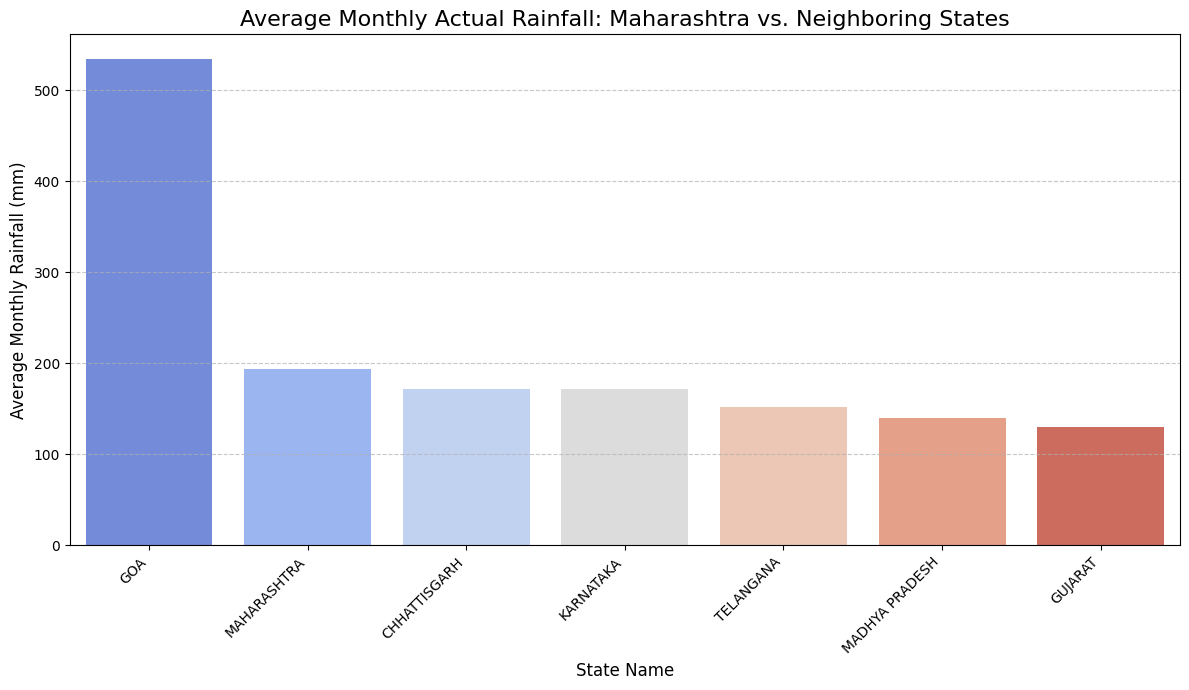

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print("### 6.1 Average Monthly Rainfall Comparison (Maharashtra vs. Neighbors)\n")

# Define Maharashtra and its neighboring states
target_state = 'MAHARASHTRA'
neighboring_states = ['GUJARAT', 'MADHYA PRADESH', 'CHHATTISGARH', 'TELANGANA', 'KARNATAKA', 'GOA']
all_states_for_comparison = [target_state] + neighboring_states

# Filter the DataFrame to include only these states
comparison_df = df[df['srcStateName'].str.upper().isin(all_states_for_comparison)].copy()

if comparison_df.empty:
    print("No data found for Maharashtra or its neighboring states. Please check state names.")
else:
    # Calculate average monthly actual rainfall for each state
    state_avg_monthly_rainfall = comparison_df.groupby('srcStateName')['Monthly Actual'].mean().reset_index()
    state_avg_monthly_rainfall = state_avg_monthly_rainfall.sort_values(by='Monthly Actual', ascending=False)

    print("Average Monthly Rainfall (mm) for Maharashtra and Neighboring States:\n")
    print(state_avg_monthly_rainfall.to_markdown(index=False, numalign="left", stralign="left", floatfmt=".2f"))

    # Plot the comparison
    plt.figure(figsize=(12, 7))
    sns.barplot(x='srcStateName', y='Monthly Actual', data=state_avg_monthly_rainfall, palette='coolwarm')
    plt.title('Average Monthly Actual Rainfall: Maharashtra vs. Neighboring States', fontsize=16)
    plt.xlabel('State Name', fontsize=12)
    plt.ylabel('Average Monthly Rainfall (mm)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


#### Interpretation of Average Monthly Rainfall Comparison:
- This bar chart provides a direct comparison of average monthly rainfall across Maharashtra and its adjacent states.
- States with higher bars indicate generally wetter conditions, while shorter bars suggest drier climates or different rainfall patterns during the recorded period.
- Goa and parts of Karnataka, being coastal and influenced by the Western Ghats, are expected to show high rainfall. Madhya Pradesh and Chhattisgarh, being central states, might exhibit varying patterns depending on monsoon penetration.
- This comparison helps contextualize Maharashtra's rainfall performance within its regional climatic zone, revealing if it aligns with or deviates from its neighbors' patterns.

**6.2 Monthly Rainfall Distribution Comparison (Boxplots)**

To understand the variability and range of rainfall, we will use boxplots to compare the monthly actual rainfall distribution across Maharashtra and its neighboring states, month by month.


### 6.2 Monthly Rainfall Distribution Comparison (Boxplots)



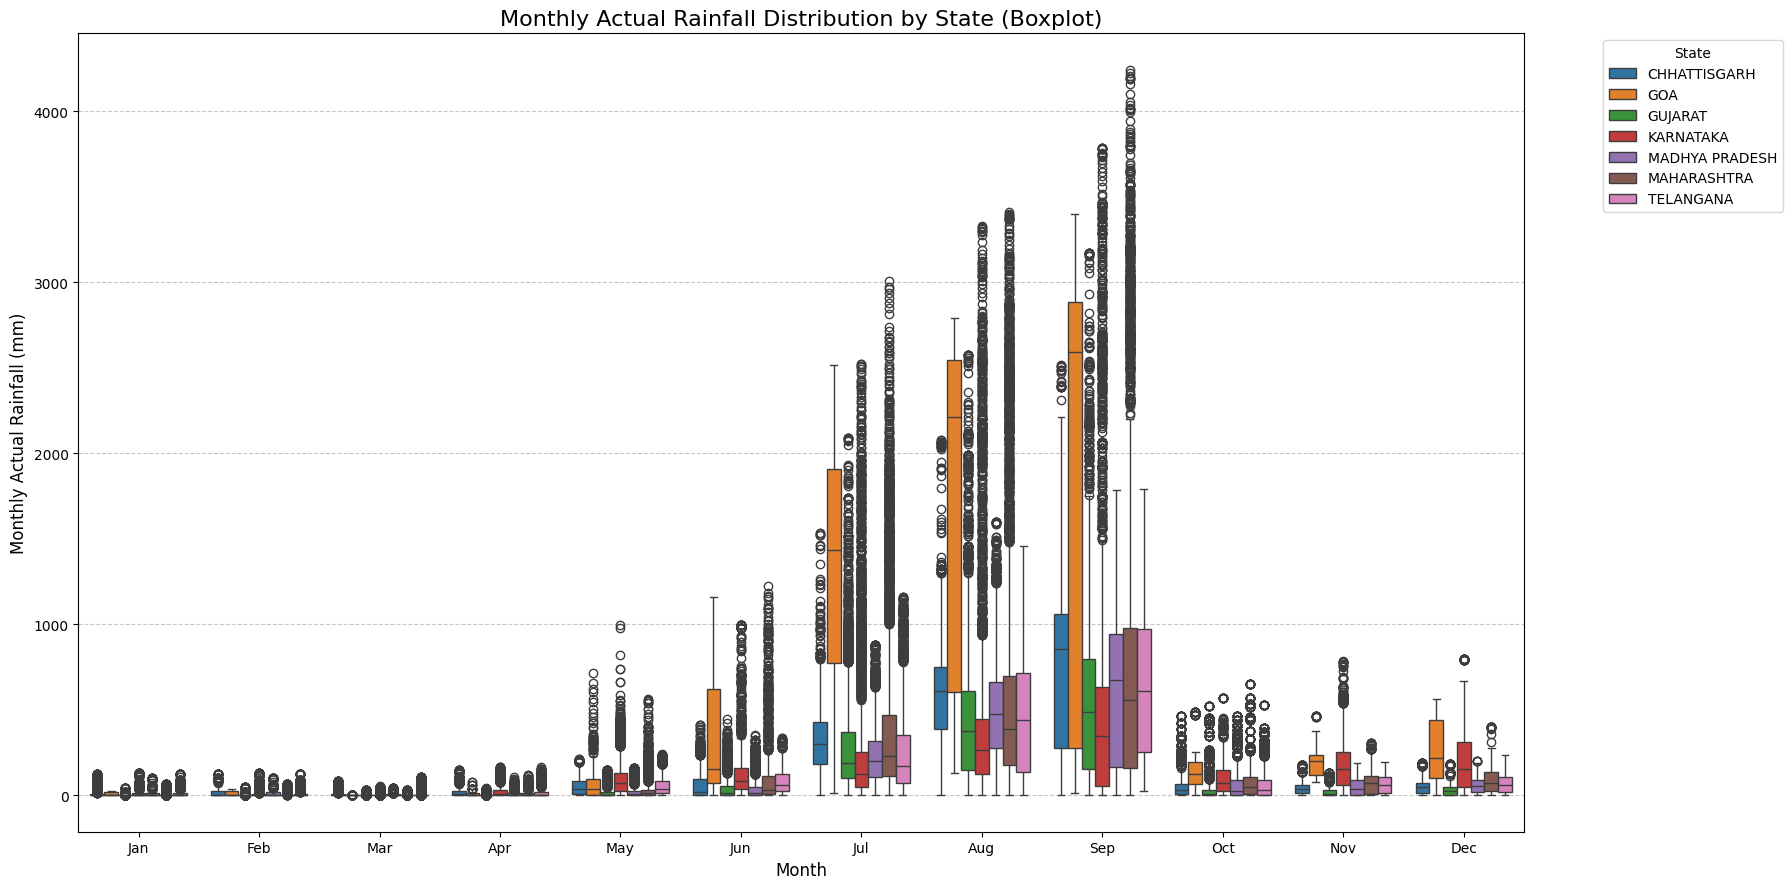

In [24]:
print("\n### 6.2 Monthly Rainfall Distribution Comparison (Boxplots)\n")

if comparison_df.empty:
    print("Cannot perform monthly rainfall distribution comparison as data is not available.")
else:
    plt.figure(figsize=(18, 9))
    sns.boxplot(data=comparison_df, x='Month', y='Monthly Actual', hue='srcStateName', palette='tab10')
    plt.title('Monthly Actual Rainfall Distribution by State (Boxplot)', fontsize=16)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Monthly Actual Rainfall (mm)', fontsize=12)
    plt.xticks(ticks=np.arange(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


#### Interpretation of Monthly Rainfall Distribution Comparison:
- These boxplots illustrate the spread and central tendency of monthly rainfall for each state across different months.
- You would typically observe distinct seasonal peaks, predominantly during the monsoon months (June-September), for most states in this region.
- Differences in median rainfall, interquartile range (IQR), and the presence of outliers among states indicate variations in monsoon intensity, duration, and the occurrence of extreme rainfall events.
- For example, Goa and coastal Karnataka might show higher medians and wider IQRs during monsoon compared to central states like Telangana or parts of MP, reflecting their heavier and more consistent rainfall. Maharashtra's boxplots would fall somewhere in between, showcasing its diverse climate zones.
- This plot helps identify which states experience more consistent rainfall, which are prone to extreme events, and how the monsoon timing might vary regionally.

**6.3 Rainfall Departure Category Comparison (Heatmap)**

A heatmap of rainfall departure categories can visually highlight the dominant rainfall conditions (e.g., Excess, Deficient) for each state, providing a qualitative comparison of rainfall performance.


### 6.3 Rainfall Departure Category Comparison (Heatmap)

Monthly Rainfall Category Percentages per State (Top 5 Categories):

| Monthly Category   | CHHATTISGARH   | GOA   | GUJARAT   | KARNATAKA   | MADHYA PRADESH   |
|:-------------------|:---------------|:------|:----------|:------------|:-----------------|
| 20                 | 0.0            | 0.0   | 0.0       | 0.0         | 0.0              |
| @                  | 0.0            | 0.0   | 0.0       | 0.0         | 0.0              |
| D                  | 19.6           | 8.1   | 13.2      | 13.4        | 13.0             |
| Deficient          | 0.0            | 0.0   | 0.0       | 0.0         | 0.0              |
| E                  | 10.0           | 11.2  | 8.8       | 13.9        | 10.3             |
| Excess             | 0.0            | 0.0   | 0.0       | 0.0         | 0.0              |
| LD                 | 15.1           | 7.6   | 8.9       | 12.7        | 12.6             |
| LE                 | 17.5        

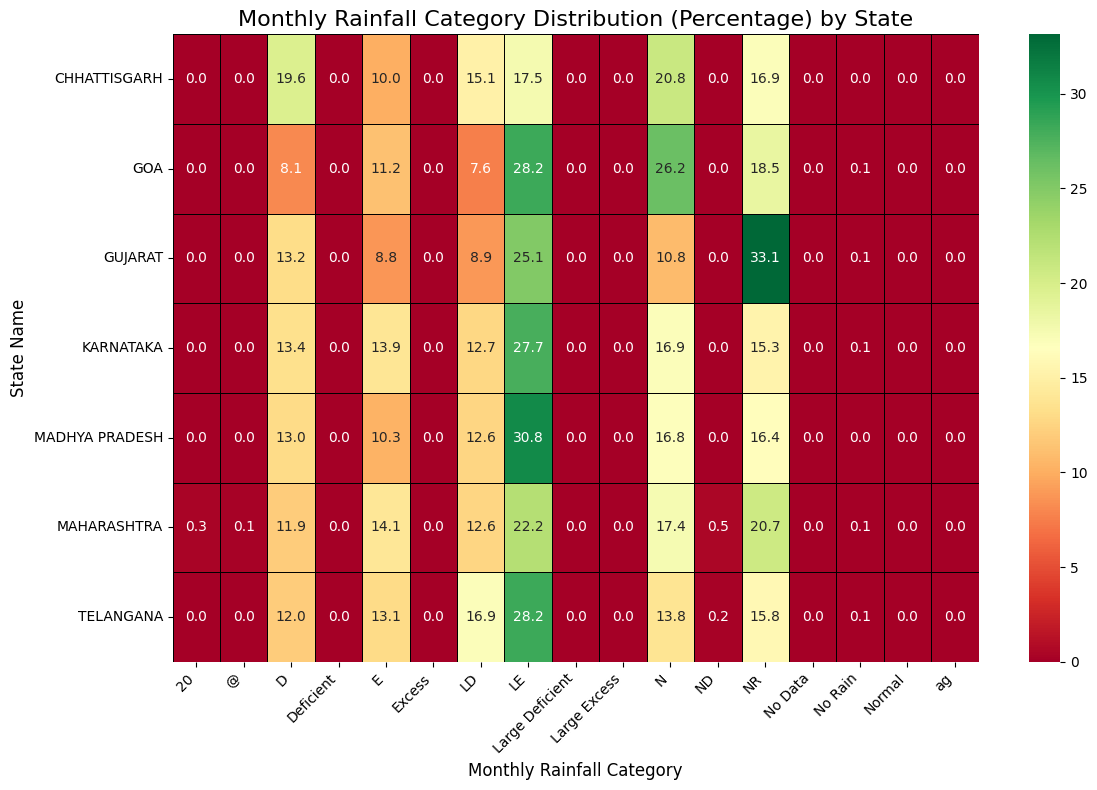

In [25]:
print("\n### 6.3 Rainfall Departure Category Comparison (Heatmap)\n")

if comparison_df.empty:
    print("Cannot perform rainfall departure category comparison as data is not available.")
else:
    # Count occurrences of each Monthly Category for each state
    monthly_category_counts = comparison_df.groupby(['srcStateName', 'Monthly Category']).size().unstack(fill_value=0)
    
    # Normalize counts to percentages within each state
    monthly_category_percentages = monthly_category_counts.div(monthly_category_counts.sum(axis=1), axis=0) * 100

    print("Monthly Rainfall Category Percentages per State (Top 5 Categories):\n")
    print(monthly_category_percentages.head().T.to_markdown(numalign="left", stralign="left", floatfmt=".1f"))


    plt.figure(figsize=(12, 8))
    sns.heatmap(monthly_category_percentages, annot=True, fmt=".1f", cmap='RdYlGn', linewidths=.5, linecolor='black')
    plt.title('Monthly Rainfall Category Distribution (Percentage) by State', fontsize=16)
    plt.xlabel('Monthly Rainfall Category', fontsize=12)
    plt.ylabel('State Name', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


#### Interpretation of Rainfall Departure Category Heatmap:
- This heatmap visually represents the percentage distribution of different monthly rainfall categories (e.g., Normal, Deficient, Large Excess) for each state.
- Darker shades (e.g., green for positive categories, red for negative categories, depending on cmap) indicate a higher prevalence of that rainfall condition in a particular state.
- By comparing rows (states), one can identify which states experience more frequent 'Excess' or 'Large Excess' rainfall, and which are more prone to 'Deficient' or 'Scanty' conditions.
- For example, if Goa shows a high percentage for 'Large Excess', while a region in Karnataka shows a high percentage for 'Deficient', it highlights regional vulnerabilities and strengths in water availability.
- Maharashtra's row will provide context on how its rainfall categories distribute compared to its neighbors, indicating its overall rainfall variability and performance during the observed period.

In [26]:
import pandas as pd # Ensure pandas is imported if not already

print("### 7.1 Export Cleaned Dataset\n")

# Define the output file path for the cleaned data
cleaned_file_path = 'cleaned_rainfall_data.csv'


df.to_csv(cleaned_file_path, index=False, float_format='%.2f')

print(f"Cleaned dataset exported successfully to '{cleaned_file_path}'.")

# Display first few rows of the cleaned data (optional, for confirmation)
print("\nFirst 5 rows of the exported cleaned dataset for verification:")
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

### 7.1 Export Cleaned Dataset

Cleaned dataset exported successfully to 'cleaned_rainfall_data.csv'.

First 5 rows of the exported cleaned dataset for verification:
| OBJ_ID   | srcDistrictName        | srcStateName      | srcYear   | srcCalendarDay      | Daily Actual   | Daily Normal   | Percentage of Daily Departure   | Daily Category   | Weekly Actual   | Weekly Normal   | Percentage of Weekly Departure   | Weekly Category   | Cumulative Date     | Cumulative Actual   | Cumulative Normal   | Percentage of Cumulative Departure   | Cumulative Category   | Monthly Actual   | Monthly Normal   | Percentage of Monthly Departure   | Monthly Category   | Weekly Date Start Date   | Weekly Date End Date   | Monthly Date Start Date   | Monthly Date End Date   | Month   | DayOfWeek   | Quarter   | DayOfYear   |
|:---------|:-----------------------|:------------------|:----------|:--------------------|:---------------|:---------------|:--------------------------------|:-----------------|:-----